In [109]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
from itertools import groupby
import glob
from scipy.signal import medfilt
from fastdtw import fastdtw
from sklearn.feature_selection import mutual_info_regression

In [110]:
#!pip3 install fastdtw

In [111]:
def newfolder(pathin):
    folder = os.path.exists(pathin)
    if not folder:
        os.makedirs(pathin)

In [112]:
pathsave='/Volumes/jiarui/hanako/plot_test' #path to save figures
if os.path.exists(pathsave)==False:
    newfolder(pathsave)

In [113]:
pathaudio_td = r"/Volumes/jiarui/hanako/audiomcut/td" #path to the audio_td folder
folders_td= sorted(os.listdir(pathaudio_td))

pathaudio_asd = r"/Volumes/jiarui/hanako/audiomcut/asd" #path to the audio_asd folder
folders_asd= sorted(os.listdir(pathaudio_asd))

In [114]:
print(folders_td[0])
print(folders_asd[0])

Addalyn
Alexander


In [115]:
def remove_(pathin): # this function is for removing hidden files in ios system
    for file in glob.glob(os.path.join(pathin, "._*")):
       try:
           os.remove(file)
           print(f"Deleted: {file}")
       except Exception as e:
           print(f"Error deleting {file}: {e}")

In [116]:
pathaudio_td_all = r"/Volumes/jiarui/hanako/audiom/TD" #path to the audio_td files
pathaudio_asd_all = r"/Volumes/jiarui/hanako/audiom/ASD" #path to the audio_td files
remove_(pathaudio_td_all)
remove_(pathaudio_asd_all)

In [117]:
def data_prepare(pathallin,pathin, folderin, idin): # Both parent and child audio are saved in the same folder with ID
                                                    # This function is for reading the parent and child audio files seperately
    audio_name=pathallin+'/'+folderin[idin]+'.wav'
    audio,sr=librosa.load(audio_name,sr=None)
    path_to_p= pathin+'/'+folderin[idin]+'/'+'PAR'
    remove_(path_to_p)
    files_p= sorted(os.listdir(path_to_p))
    path_to_c = pathin+'/'+folderin[idin]+'/'+'CHI'
    remove_(path_to_c)
    files_c= sorted(os.listdir(path_to_c))
    return audio,sr,path_to_p,path_to_c,files_p,files_c

In [118]:
audio_td,sr_td,path_to_p_td,path_to_c_td,files_p_td,files_c_td= data_prepare(pathaudio_td_all,pathaudio_td, folders_td, 0)
audio_asd,sr_asd,path_to_p_asd,path_to_c_asd,files_p_asd,files_c_asd= data_prepare(pathaudio_asd_all,pathaudio_asd, folders_asd, 0)

In [119]:
def f0fitinter(path,files,fminin,fmaxin,label): # This function is for extracting f0 and energy
    t1=[]
    t1e=[]
    for i in range(len(files)):
        x,sr1=librosa.load(path+"/"+files[i],sr=None)
        duration=len(x)/sr1
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=fminin, fmax=fmaxin)
        print(files[i])
        if (len(np.where(f0>10)[0]))<1:
            print(files[i])
            continue
        energy = librosa.feature.rms(y=x, frame_length=512, hop_length=128)[0]
        emean=np.round(np.nanmean(energy),decimals=2)
        emax=np.round(np.nanmax(energy),decimals=2)
        emin=np.round(np.nanmin(energy),decimals=2)
        erange=np.round(np.nanmax(energy)-np.nanmin(energy),decimals=2)
        f0mean=np.round(np.nanmean(f0),decimals=2)
        f0max=np.round(np.nanmax(f0),decimals=2)
        f0min=np.round(np.nanmin(f0),decimals=2)
        f0range=np.round(np.nanmax(f0)-np.nanmin(f0),decimals=2)
        starttime=np.array(files[i].split('.')[0])
        starttime = starttime.astype(float)
        label=label
        t=np.c_[starttime,f0mean,f0max,f0min,f0range,duration,label] # Pitch features [mean, max, min, range], starttime is the start time of the audio clip, label is used for labeling parent/child
        te=np.c_[starttime,emean,emax,emin,erange,duration,label] # Energy features [mean, max, min, range]
        t1.append(t)
        t1e.append(te)
    return np.array(t1)[:,0],np.array(t1e)[:,0]

In [120]:
pitch_p_td,energy_p_td=f0fitinter(path_to_p_td,files_p_td,180,500,0)
pitch_c_td,energy_c_td=f0fitinter(path_to_c_td,files_c_td,180,600,1)

pitch_p_asd,energy_p_asd=f0fitinter(path_to_p_asd,files_p_asd,180,500,0)
pitch_c_asd,energy_c_asd=f0fitinter(path_to_c_asd,files_c_asd,180,600,1)

119859.wav
124415.wav
127383.wav
130314.wav
132780.wav
135365.wav
135365.wav
137923.wav
141998.wav
149109.wav
158600.wav
177407.wav
184992.wav
190365.wav
194711.wav
196659.wav
197684.wav
201438.wav
206436.wav
210967.wav
212873.wav
220794.wav
220794.wav
227353.wav
231415.wav
237388.wav
241378.wav
254719.wav
269485.wav
272193.wav
274678.wav
276229.wav
282290.wav
284713.wav
291192.wav
296403.wav
298064.wav
304881.wav
312012.wav
322946.wav
332197.wav
337545.wav
340271.wav
350743.wav
357247.wav
361696.wav
371546.wav
383449.wav
383449.wav
398896.wav
436320.wav
441696.wav
444750.wav
452011.wav
455476.wav
461687.wav
122529.wav
125928.wav
129129.wav
139425.wav
143781.wav
154836.wav
159423.wav
180477.wav
183597.wav
193632.wav
195723.wav
195723.wav
202488.wav
209183.wav
212073.wav
216282.wav
228624.wav
230340.wav
232617.wav
239448.wav
247272.wav
256014.wav
256014.wav
257264.wav
261781.wav
264396.wav
265752.wav
271219.wav
271219.wav
272910.wav
279436.wav
281148.wav
283305.wav
294891.wav
294891.wav

In [121]:
def standardize(arr, ignore_nan=True): # Standardization
    if ignore_nan:
        mean_val = np.nanmean(arr)
        std_val = np.nanstd(arr)
    else:
        mean_val = np.mean(arr)
        std_val = np.std(arr)
    
    standardized_arr = (arr - mean_val) / std_val
    return standardized_arr

In [122]:
def format_and_plot_pitch_series(t1,t2): # format the pitch and energy features for a plotting purposes
    combined = np.vstack((t1, t2))
    combined[:, 0] = combined[:, 0].astype(float)
    sort_indices = np.argsort(combined[:, 0].astype(float))
    sorted_matrix = combined[sort_indices]
    is_mother = sorted_matrix[:, -1] == 0
    is_child  = sorted_matrix[:, -1] == 1
    
    # Extract feature columns (columns 1 to 4) for mothers and children and convert to float.
    mothers_features = sorted_matrix[is_mother, 1:6].astype(float)
    children_features = sorted_matrix[is_child, 1:6].astype(float)    
    # Compute the mean of each feature (f0mean, f0max, f0min, f0range)
    mothers_mean = np.mean(mothers_features, axis=0)
    children_mean = np.mean(children_features, axis=0)
    # Create copies for the new matrices
    new_mother_matrix = sorted_matrix.copy()
    new_child_matrix = sorted_matrix.copy()
    new_mother_matrix_nan = sorted_matrix.copy()
    new_child_matrix_nan = sorted_matrix.copy()    
    for col in range(1, 6):
        new_mother_matrix[is_child, col] = mothers_mean[col-1]
    for col in range(1, 6):
        new_child_matrix[is_mother, col] = children_mean[col-1]  
    standardized_matrix_m = new_mother_matrix.copy()
    standardized_matrix_c = new_child_matrix.copy()
    for col in range(6):
        # Convert the column to float in case it is stored as objects or strings.
        col_data = standardized_matrix_m[:, col].astype(float)
        standardized_matrix_m[:, col] = standardize(col_data)
    for col in range(6):
        # Convert the column to float in case it is stored as objects or strings.
        col_data = standardized_matrix_c[:, col].astype(float)
        standardized_matrix_c[:, col] = standardize(col_data)
    
    return new_mother_matrix, new_child_matrix,standardized_matrix_m,standardized_matrix_c #output the raw and standardized data

In [151]:
pitch_p_td_r,pitch_c_td_r,pitch_p_td_n,pitch_c_td_n=format_and_plot_pitch_series(pitch_p_td,pitch_c_td)
pitch_p_asd_r,pitch_c_asd_r,pitch_p_asd_n,pitch_c_asd_n=format_and_plot_pitch_series(pitch_p_asd,pitch_c_asd)

In [152]:
energy_p_td_r,energy_c_td_r,energy_p_td_n,energy_c_td_n=format_and_plot_pitch_series(energy_p_td,energy_c_td)
energy_p_asd_r,energy_c_asd_r,energy_p_asd_n,energy_c_asd_n=format_and_plot_pitch_series(energy_p_asd,energy_c_asd)

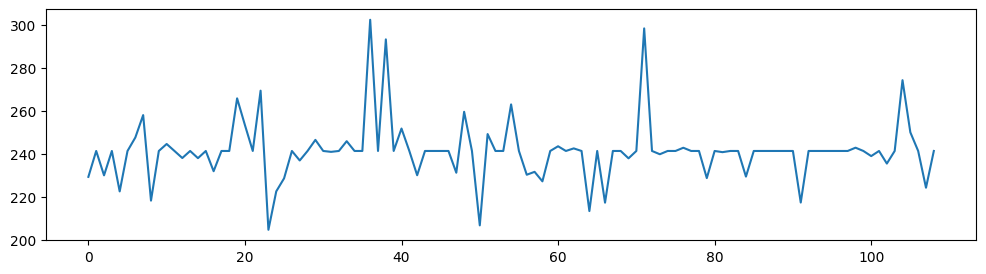

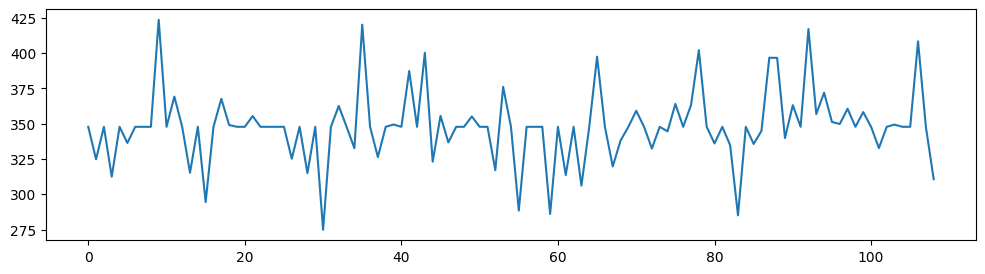

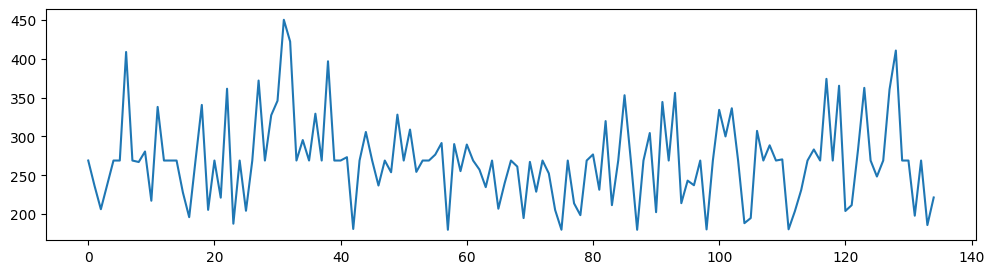

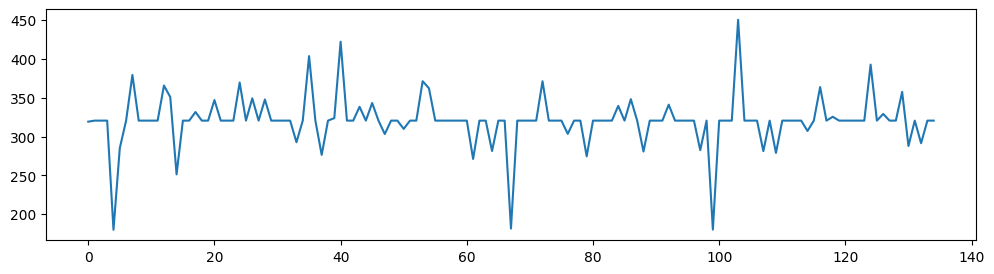

In [153]:
plt.figure(figsize=(12, 3)) #Plot the raw data
plt.plot(pitch_p_td_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(pitch_c_td_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(pitch_p_asd_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_asd_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(pitch_c_asd_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_asd_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()

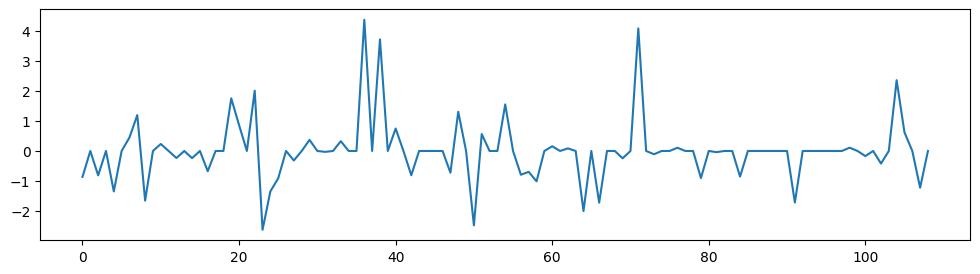

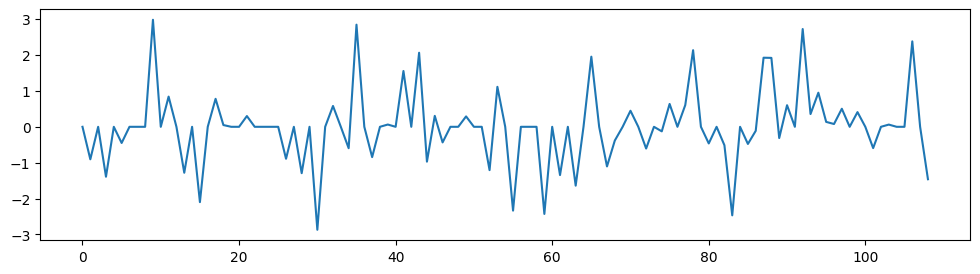

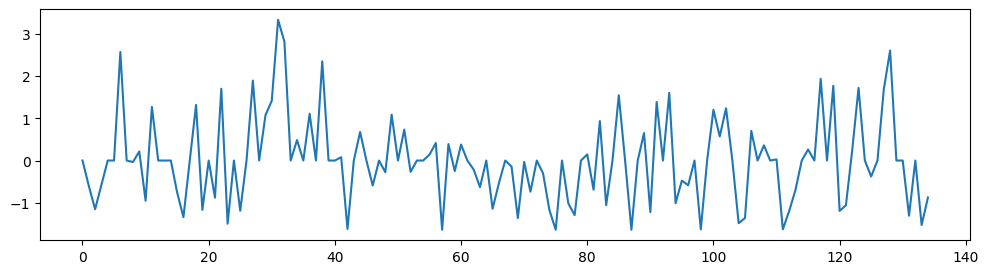

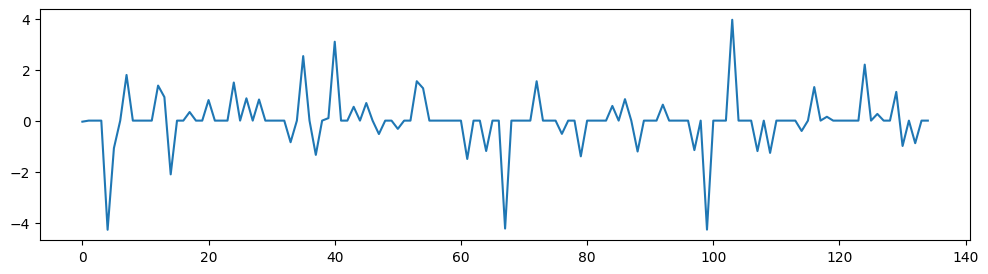

In [154]:
plt.figure(figsize=(12, 3)) #Plot the raw data
plt.plot(pitch_p_td_n[:,1])
plt.savefig(pathsave+'/'+'parent_raw_td_pmean_norm'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(pitch_c_td_n[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_pmean_norm'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(pitch_p_asd_n[:,1])
plt.savefig(pathsave+'/'+'parent_raw_asd_pmean_norm'+folders_asd[0],bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(pitch_c_asd_n[:,1])
plt.savefig(pathsave+'/'+'child_raw_asd_pmean_norm'+folders_asd[0],bbox_inches='tight')
plt.show()

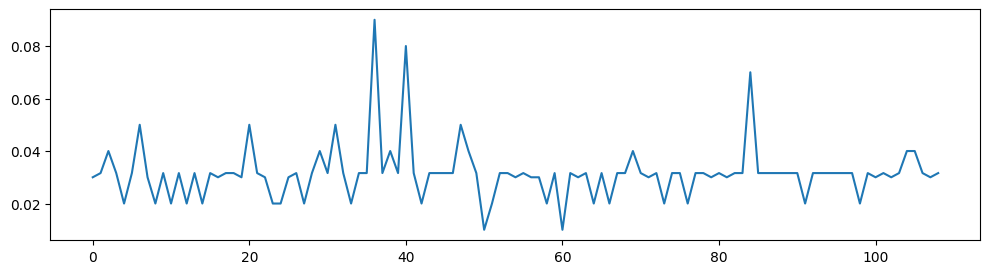

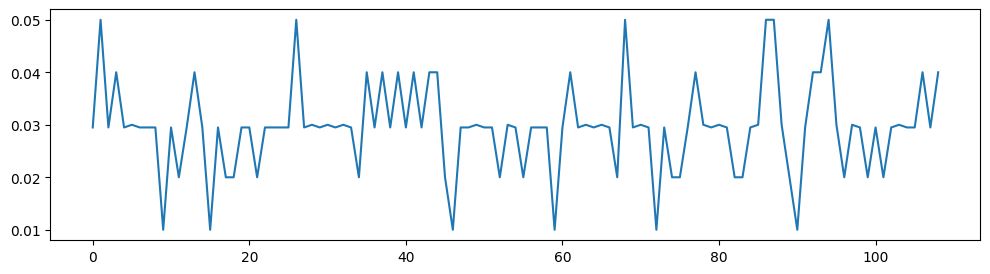

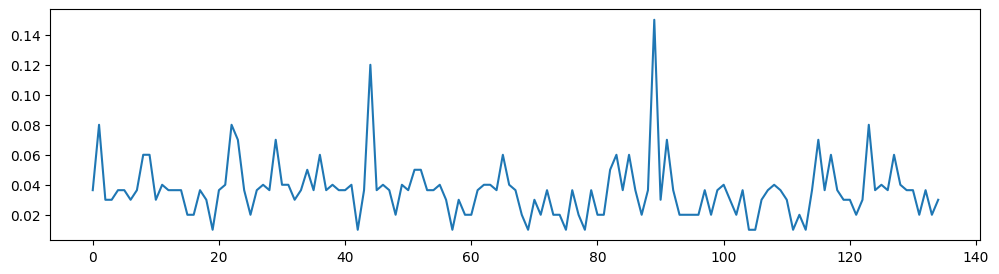

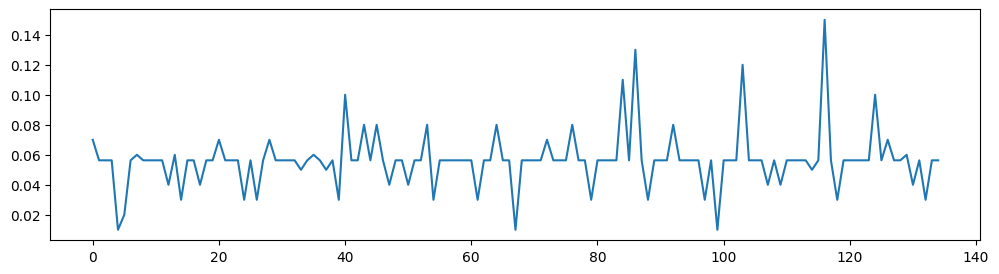

In [127]:
plt.figure(figsize=(12, 3)) 
plt.plot(energy_p_td_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_td_emean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(energy_c_td_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_emean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(energy_p_asd_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_asd_emean_'+folders_asd[0],bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(energy_c_asd_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_asd_emean_'+folders_asd[0],bbox_inches='tight')
plt.show()

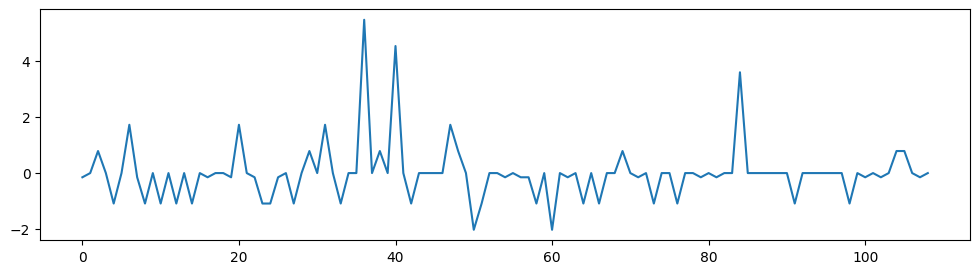

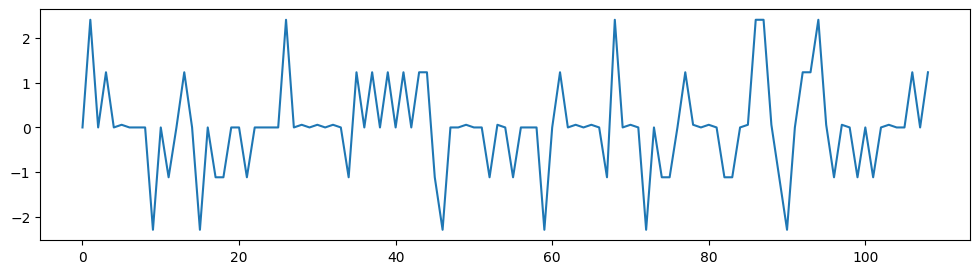

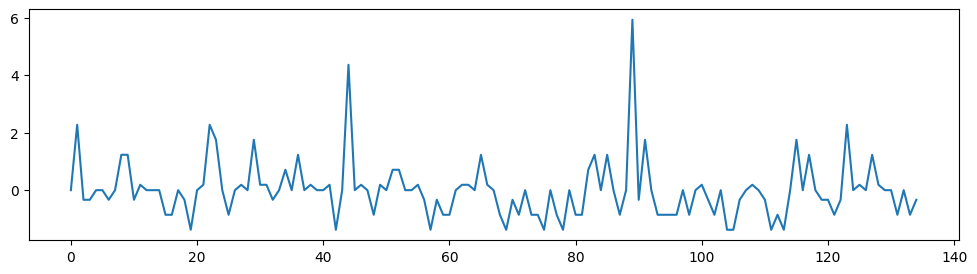

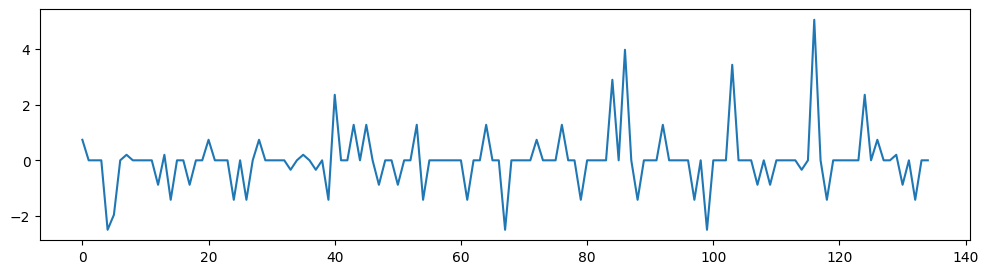

In [128]:
plt.figure(figsize=(12, 3)) 
plt.plot(energy_p_td_n[:,1])
plt.savefig(pathsave+'/'+'parent_raw_td_emean_norm'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(energy_c_td_n[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_emean_norm'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(energy_p_asd_n[:,1])
plt.savefig(pathsave+'/'+'parent_raw_asd_emean_norm'+folders_asd[0],bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(energy_c_asd_n[:,1])
plt.savefig(pathsave+'/'+'child_raw_asd_emean_norm'+folders_asd[0],bbox_inches='tight')
plt.show()

In [129]:
def dtw_calculate(p_pitch,c_pitch): # calculate the dtw distance
    # Define a simple distance function for scalar values
    distance_func = lambda a, b: abs(a - b)
    # Compute the fastDTW distance and optimal alignment path using the normalized data
    distance, path = fastdtw(p_pitch, c_pitch, dist=distance_func)
    print("FastDTW distance (normalized)/duration:", distance/(len(p_pitch)))
    return distance, path

In [130]:
distance_td_f0mean,path_td_f0mean=dtw_calculate(pitch_p_td_n[:,1],pitch_c_td_n[:,1])
distance_asd_f0mean,path_asd_f0mean=dtw_calculate(pitch_p_asd_n[:,1],pitch_c_asd_n[:,1])

distance_td_f0max,path_td_f0max=dtw_calculate(pitch_p_td_n[:,2],pitch_c_td_n[:,2])
distance_asd_f0max,path_asd_f0max=dtw_calculate(pitch_p_asd_n[:,2],pitch_c_asd_n[:,2])

distance_td_f0min,path_td_f0min=dtw_calculate(pitch_p_td_n[:,3],pitch_c_td_n[:,3])
distance_asd_f0min,path_asd_f0min=dtw_calculate(pitch_p_asd_n[:,3],pitch_c_asd_n[:,3])

distance_td_f0range,path_td_f0range=dtw_calculate(pitch_p_td_n[:,4],pitch_c_td_n[:,4])
distance_asd_f0range,path_asd_f0range=dtw_calculate(pitch_p_asd_n[:,4],pitch_c_asd_n[:,4])

FastDTW distance (normalized)/duration: 0.5648823453579278
FastDTW distance (normalized)/duration: 0.5827887212256965
FastDTW distance (normalized)/duration: 0.5489481548291939
FastDTW distance (normalized)/duration: 0.5749998811398425
FastDTW distance (normalized)/duration: 0.5460139540626149
FastDTW distance (normalized)/duration: 0.5728643819322363
FastDTW distance (normalized)/duration: 0.5959247246912986
FastDTW distance (normalized)/duration: 0.5723098525079573


In [131]:
distance_td_emean,path_td_emean=dtw_calculate(energy_p_td_n[:,1],energy_c_td_n[:,1])
distance_asd_emean,path_asd_emean=dtw_calculate(energy_p_asd_n[:,1],energy_c_asd_n[:,1])

distance_td_emax,path_td_emax=dtw_calculate(energy_p_td_n[:,2],energy_c_td_n[:,2])
distance_asd_emax,path_asd_emax=dtw_calculate(energy_p_asd_n[:,2],energy_c_asd_n[:,2])

#distance_td_emin,path_td_emin=dtw_calculate(energy_p_td_n[:,3],energy_c_td_n[:,3])
#distance_asd_emin,path_asd_emin=dtw_calculate(energy_p_asd_n[:,3],energy_c_asd_n[:,3])

#distance_td_erange,path_td_erange=dtw_calculate(energy_p_td_n[:,4],energy_c_td_n[:,4])
#distance_asd_erange,path_asd_erange=dtw_calculate(energy_p_asd_n[:,4],energy_c_asd_n[:,4])

FastDTW distance (normalized)/duration: 0.46139614898338777
FastDTW distance (normalized)/duration: 0.529386933206554
FastDTW distance (normalized)/duration: 0.3753202935950879
FastDTW distance (normalized)/duration: 0.5262175186569618


In [132]:
def path_plot(pathin,p_pitch,c_pitch,folderin,idin,namein,distancein): #plot the path of the DTW matching
    path=np.array(pathin)
    pause_mask_parent = np.isnan(p_pitch)
    #print(len(np.where(pause_mask_parent==True)[0]))
    pause_mask_child  = np.isnan(c_pitch)
    parent_pauses_on_path = pause_mask_parent[path[:, 0]]
    child_pauses_on_path  = pause_mask_child[path[:, 1]]
    #print(len(np.where(parent_pauses_on_path==True)[0]))
    pause_on_path = parent_pauses_on_path | child_pauses_on_path
    # Now plot the warping path with a diagonal line for reference.
        
    i_indices = path[:, 0]
    j_indices = path[:, 1]
    lags = j_indices - i_indices  # Positive: child leads, Negative: mother leads

    total = len(lags)
    n_child_leads = np.sum(lags > 0)
    n_mother_leads = np.sum(lags < 0)
    n_sync = np.sum(lags == 0)

    prop_mother_leads = n_mother_leads / total
    prop_child_leads = n_child_leads / total
    prop_sync = n_sync / total
    avg_lag = np.mean(lags)
    std_lag = np.std(lags)

    stats = {
        'prop_mother_leads': prop_mother_leads,
        'prop_child_leads': prop_child_leads,
        'prop_synchronous': prop_sync,
        'average_lag': avg_lag,
        'lag_std': std_lag
    }

    print("DTW Leading Role Stats:")
    for k, v in stats.items():
        print(f"{k}: {v:.3f}")

    plt.figure(figsize=(6, 6))
    plt.plot(path[:, 0], path[:, 1],  linestyle='-', label='Alignment Path')

    # Overlay markers where pauses occurred (blue 'x' markers)
    #plt.scatter(path[pause_on_path, 0], path[pause_on_path, 1],
            #color='orange', marker='x', s=5, label='Pauses (filled)')

    # Plot the diagonal line
    max_val = max(path[:, 0].max(), path[:, 1].max())
    plt.plot([0, max_val], [0, max_val], 'r--', label='Diagonal')

    plt.xlabel("Parent pitch index")
    plt.ylabel("Child pitch index")
    plt.title("FastDTW Optimal Alignment Path_"+namein+'_'+str(np.round(distancein,decimals=2)))
    plt.savefig(pathsave+'/'+'dtw'+namein+'_'+folderin[idin],bbox_inches='tight')
    plt.show()

DTW Leading Role Stats:
prop_mother_leads: 0.479
prop_child_leads: 0.473
prop_synchronous: 0.048
average_lag: -0.411
lag_std: 5.219


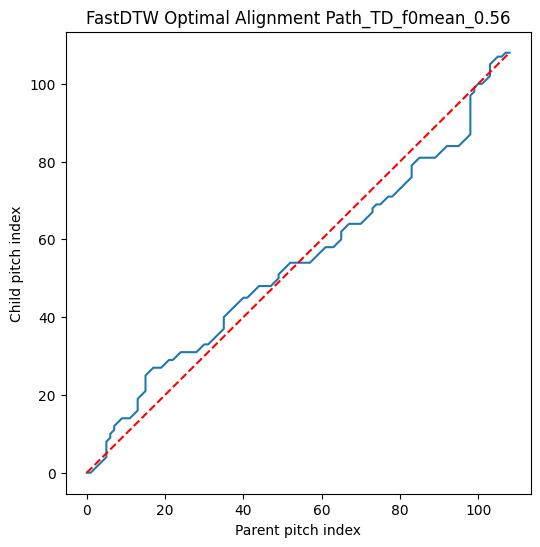

DTW Leading Role Stats:
prop_mother_leads: 0.864
prop_child_leads: 0.085
prop_synchronous: 0.051
average_lag: 2.994
lag_std: 3.307


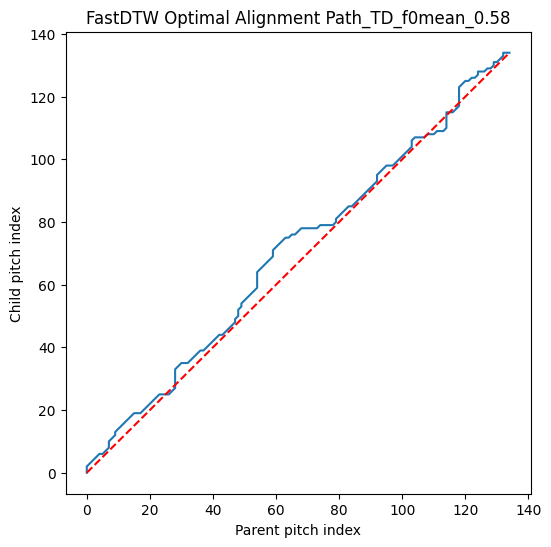

In [133]:
path_plot(path_td_f0mean,pitch_p_td_n[:,1],pitch_c_td_n[:,1],folders_td,0,'TD_f0mean',distance_td_f0mean/len(pitch_p_td_n[:,1]))
path_plot(path_asd_f0mean,pitch_p_asd_n[:,1],pitch_c_asd_n[:,1],folders_asd,0,'TD_f0mean',distance_asd_f0mean/len(pitch_p_asd_n[:,1]))

DTW Leading Role Stats:
prop_mother_leads: 0.755
prop_child_leads: 0.190
prop_synchronous: 0.054
average_lag: 2.095
lag_std: 2.696


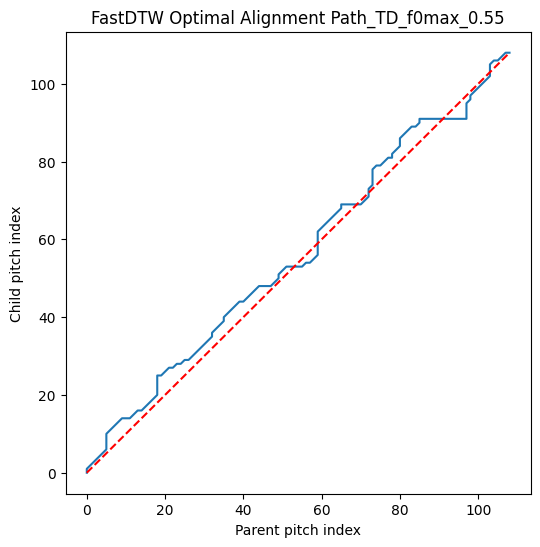

DTW Leading Role Stats:
prop_mother_leads: 0.456
prop_child_leads: 0.529
prop_synchronous: 0.015
average_lag: -1.328
lag_std: 11.396


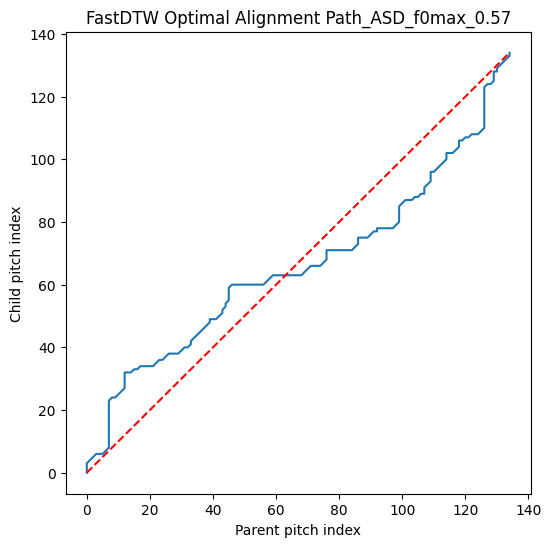

In [134]:
path_plot(path_td_f0max,pitch_p_td_n[:,2],pitch_c_td_n[:,2],folders_td,0,'TD_f0max',distance_td_f0max/len(pitch_p_td_n[:,2]))
path_plot(path_asd_f0max,pitch_p_asd_n[:,2],pitch_c_asd_n[:,2],folders_asd,0,'ASD_f0max',distance_asd_f0max/len(pitch_p_asd_n[:,2]))

DTW Leading Role Stats:
prop_mother_leads: 0.000
prop_child_leads: 0.988
prop_synchronous: 0.012
average_lag: -17.857
lag_std: 9.225


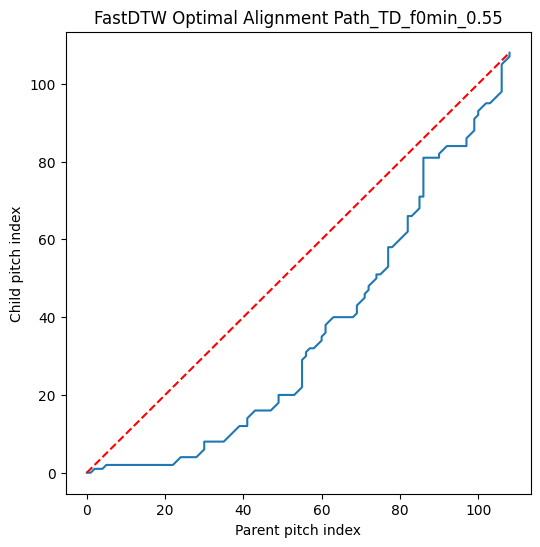

DTW Leading Role Stats:
prop_mother_leads: 0.223
prop_child_leads: 0.750
prop_synchronous: 0.027
average_lag: -4.255
lag_std: 4.912


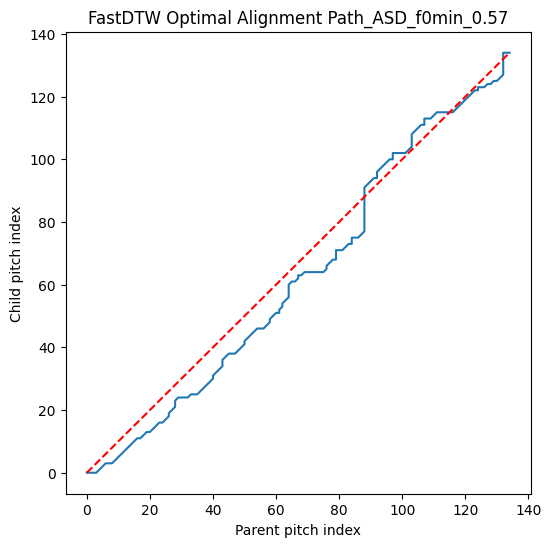

In [135]:
path_plot(path_td_f0min,pitch_p_td_n[:,3],pitch_c_td_n[:,3],folders_td,0,'TD_f0min',distance_td_f0min/len(pitch_p_td_n[:,3]))
path_plot(path_asd_f0min,pitch_p_asd_n[:,3],pitch_c_asd_n[:,3],folders_asd,0,'ASD_f0min',distance_asd_f0min/len(pitch_p_asd_n[:,3]))

DTW Leading Role Stats:
prop_mother_leads: 0.000
prop_child_leads: 0.987
prop_synchronous: 0.013
average_lag: -12.829
lag_std: 7.083


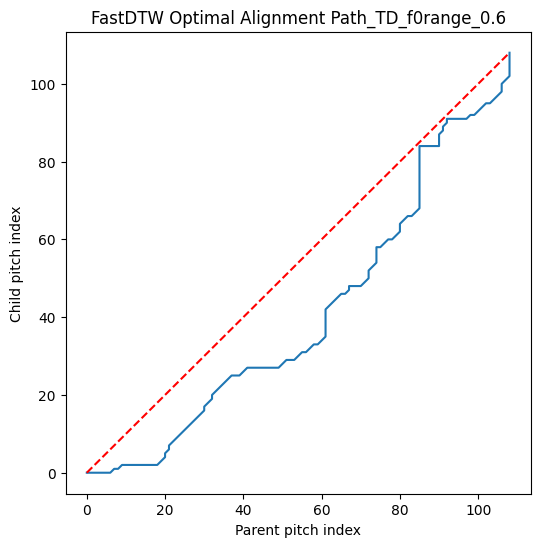

DTW Leading Role Stats:
prop_mother_leads: 0.868
prop_child_leads: 0.112
prop_synchronous: 0.020
average_lag: 9.284
lag_std: 6.629


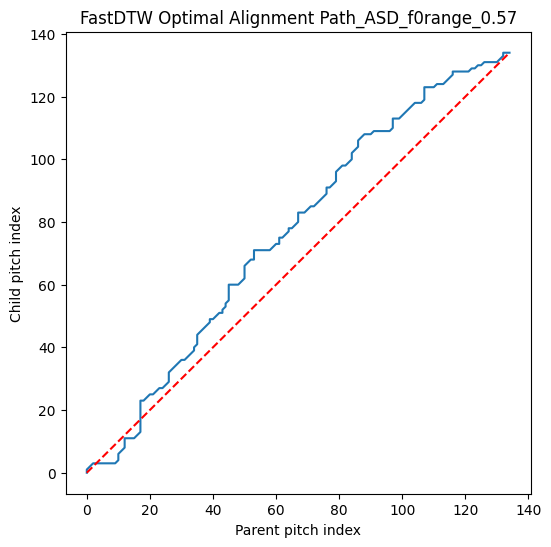

In [136]:
path_plot(path_td_f0range,pitch_p_td_n[:,4],pitch_c_td_n[:,4],folders_td,0,'TD_f0range',distance_td_f0range/len(pitch_p_td_n[:,4]))
path_plot(path_asd_f0range,pitch_p_asd_n[:,4],pitch_c_asd_n[:,4],folders_asd,0,'ASD_f0range',distance_asd_f0range/len(pitch_p_asd_n[:,4]))

DTW Leading Role Stats:
prop_mother_leads: 0.322
prop_child_leads: 0.624
prop_synchronous: 0.054
average_lag: -1.456
lag_std: 3.323


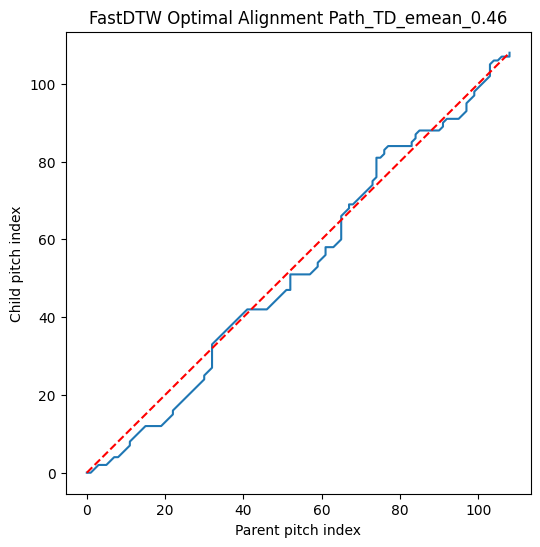

DTW Leading Role Stats:
prop_mother_leads: 0.042
prop_child_leads: 0.916
prop_synchronous: 0.042
average_lag: -6.141
lag_std: 4.730


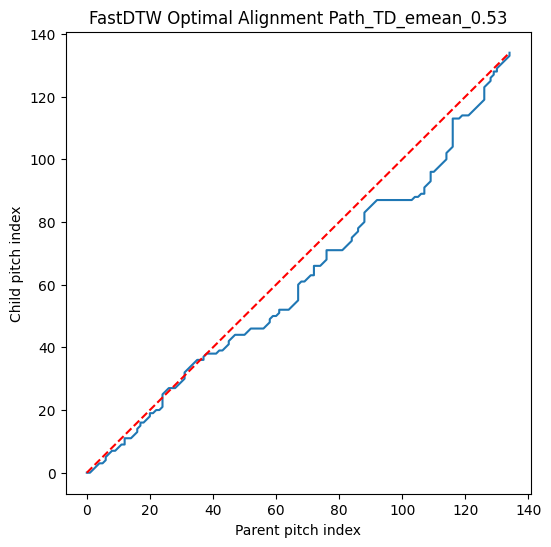

In [137]:
path_plot(path_td_emean,energy_p_td_n[:,1],energy_c_td_n[:,1],folders_td,0,'TD_emean',distance_td_emean/len(energy_p_td_n[:,1]))
path_plot(path_asd_emean,energy_p_asd_n[:,1],energy_c_asd_n[:,1],folders_asd,0,'TD_emean',distance_asd_emean/len(energy_p_asd_n[:,1]))

DTW Leading Role Stats:
prop_mother_leads: 0.739
prop_child_leads: 0.223
prop_synchronous: 0.038
average_lag: 3.255
lag_std: 4.420


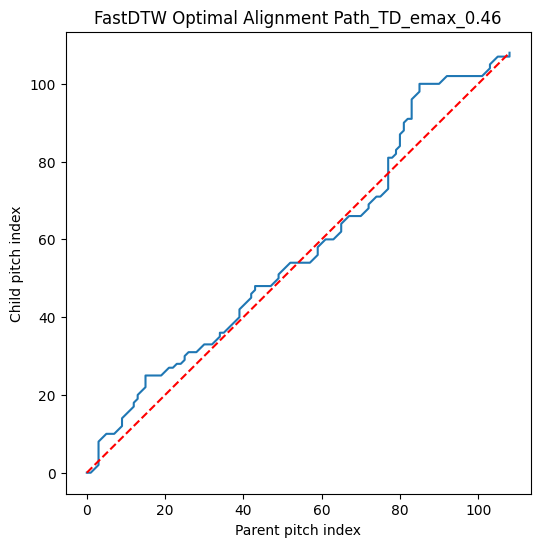

DTW Leading Role Stats:
prop_mother_leads: 0.149
prop_child_leads: 0.814
prop_synchronous: 0.036
average_lag: -2.423
lag_std: 3.077


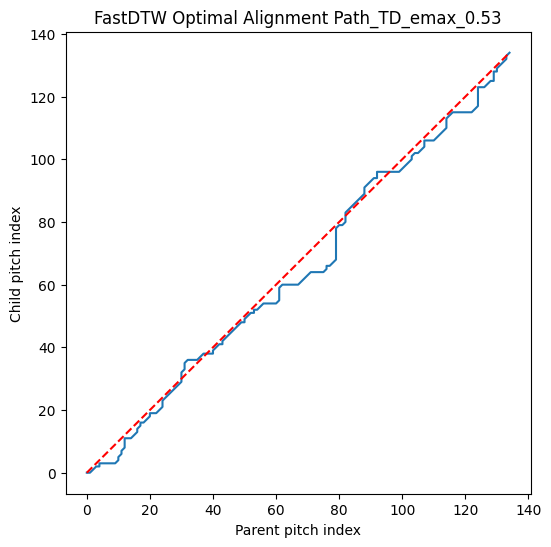

In [138]:
path_plot(path_td_emax,energy_p_td_n[:,2],energy_c_td_n[:,2],folders_td,0,'TD_emax',distance_td_emean/len(energy_p_td_n[:,2]))
path_plot(path_asd_emax,energy_p_asd_n[:,2],energy_c_asd_n[:,2],folders_asd,0,'TD_emax',distance_asd_emean/len(energy_p_asd_n[:,2]))

In [139]:
#path_plot(path_td_emin,energy_p_td_n[:,3],energy_c_td_n[:,3],folders_td,0,'TD_emin',distance_td_emean/len(energy_p_td_n[:,3]))
#path_plot(path_asd_emin,energy_p_asd_n[:,3],energy_c_asd_n[:,3],folders_asd,0,'TD_emin',distance_asd_emean/len(energy_p_asd_n[:,3]))

In [140]:
#path_plot(path_td_erange,energy_p_td_n[:,4],energy_c_td_n[:,4],folders_td,0,'TD_erange',distance_td_emean/len(energy_p_td_n[:,4]))
#path_plot(path_asd_erange,energy_p_asd_n[:,4],energy_c_asd_n[:,4],folders_asd,0,'TD_erange',distance_asd_emean/len(energy_p_asd_n[:,4]))

In [141]:
def plot_dtw_matching(series1, series2,pathin, offset=4): # plot the dtw matching. This is not for the analysis but only for visualization to confirm whether the matching is as expected
    
    # Create x-axis indices (assumes both series have the same length)
    n = len(series1)
    x = np.arange(n)
    
    # Prepare the plot: plot series1 (shifted upward) and series2
    plt.figure(figsize=(12, 8))
    plt.plot(x, series1 + offset, label="Parent (shifted upward)", color="blue")
    plt.plot(x, series2, label="Child", color="green")
    
    # For each matching pair in the warping path, draw a connecting line
    # Each pair (i, j) means that point i in series1 is matched with point j in series2.
    for i, j in pathin:
        plt.plot([i, j], [series1[i] + offset, series2[j]], color='gray', linewidth=0.5)
    
    plt.xlabel("Time index")
    plt.ylabel("Standardized Pitch")
    plt.title("DTW Matching between Two Time Series")
    #plt.legend()
    #plt.savefig(save_path, bbox_inches='tight')
    
    plt.show()


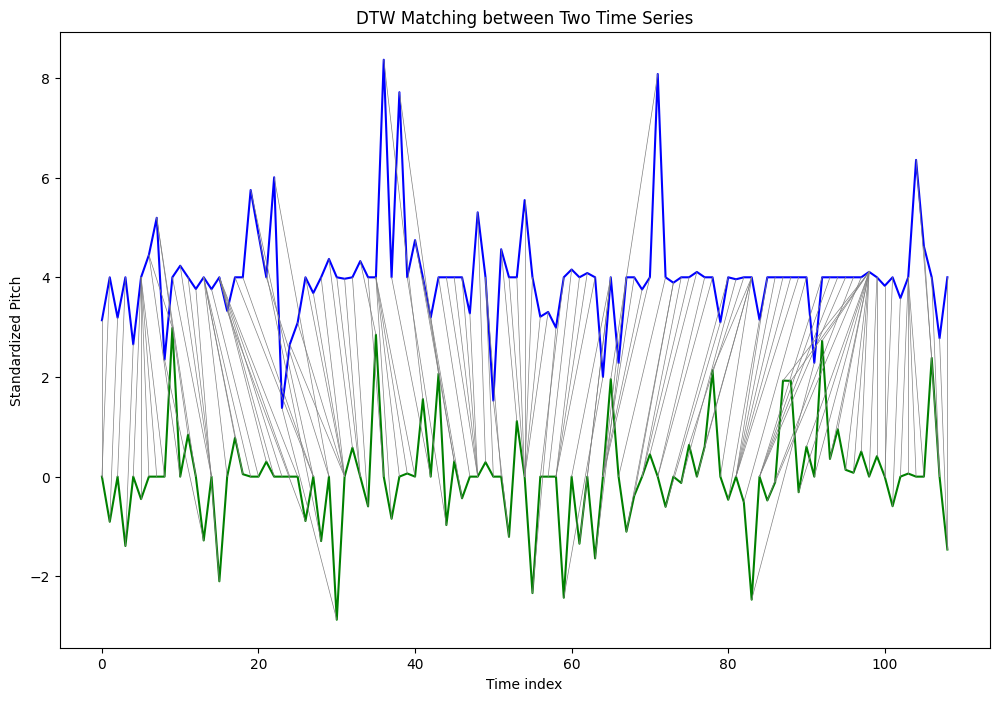

In [142]:
plot_dtw_matching(pitch_p_td_n[:,1],pitch_c_td_n[:,1], np.array(path_td_f0mean), offset=4)

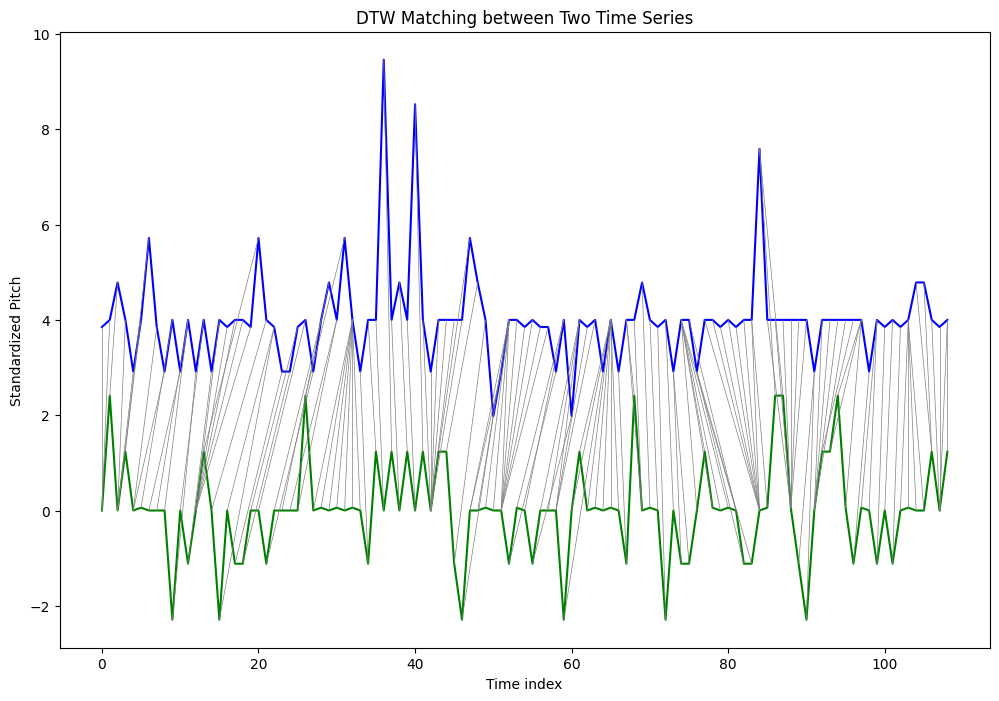

In [143]:
plot_dtw_matching(energy_p_td_n[:,1],energy_c_td_n[:,1], np.array(path_td_emean), offset=4)

In [229]:
def corr_nan_safe(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    #print(np.sum(mask))
    if np.sum(mask) < 3:
        return 0
    return np.corrcoef(x[mask], y[mask])[0, 1]
def rolling_tlcc(series1, series2, window_size, max_lag): # rolling window cross-correlation
    correlations = []
    lags = range(-max_lag, max_lag + 1)
    series1_n=series1.copy()
    series2_n=series2.copy()
    series1_n[np.where(np.abs(series1 <0.0001))[0]] = np.nan
    series2_n[np.where(np.abs(series2 <0.0001))[0]] = np.nan   
    for i in range(len(series1) - window_size + 1):
        window1 = series1_n[i:i + window_size]
        window2 = series2_n[i:i + window_size]
        
        # Compute cross-correlation for different lags
        cross_corr = []
        for lag in lags:
            if lag > 0:
                #corr = np.corrcoef(window1[:-lag], window2[lag:])[0, 1] if len(window1[:-lag]) > 1 else np.nan
                corr = corr_nan_safe(window1[:-lag], window2[lag:])
            elif lag < 0:
                #corr = np.corrcoef(window1[-lag:], window2[:lag])[0, 1] if len(window1[-lag:]) > 1 else np.nan
                corr = corr_nan_safe(window1[-lag:], window2[:lag])
            else:
                #corr = np.corrcoef(window1, window2)[0, 1]
                corr = corr_nan_safe(window1, window2)
            cross_corr.append(corr)
        
        correlations.append(cross_corr)
    
    return pd.DataFrame(correlations, columns=lags)

In [230]:
np.corrcoef(pitch_p_td_n[:50,1], pitch_c_td_n[50:100,1])[0, 1]

0.05550659361728722

In [231]:
tlcc_results_td_mean=rolling_tlcc(pitch_p_td_n[:,1],pitch_c_td_n[:,1], 50, 10)
#tlcc_results_td_max=rolling_tlcc(pitch_p_td_n[:,2],pitch_c_td_n[:,2], 50, 5)
#tlcc_results_td_min=rolling_tlcc(pitch_p_td_n[:,3],pitch_c_td_n[:,3], 50, 5)
#tlcc_results_td_range=rolling_tlcc(pitch_p_td_n[:,4],pitch_c_td_n[:,4], 50, 5)

In [232]:
tlcc_results_td_mean_e=rolling_tlcc(energy_p_td_n[:,1],energy_c_td_n[:,1], 50, 10)
#tlcc_results_td_max_e=rolling_tlcc(energy_p_td_n[:,2],energy_c_td_n[:,2], 50, 5)
#tlcc_results_td_min_e=rolling_tlcc(energy_p_td_n[:,3],energy_c_td_n[:,3], 50, 5)
#tlcc_results_td_range_e=rolling_tlcc(energy_p_td_n[:,4],energy_c_td_n[:,4], 50, 5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [233]:
tlcc_results_asd_mean=rolling_tlcc(pitch_p_asd_n[:,1],pitch_c_asd_n[:,1], 50, 10)
#tlcc_results_asd_max=rolling_tlcc(pitch_p_asd_n[:,2],pitch_c_asd_n[:,2], 50, 5)
#tlcc_results_asd_min=rolling_tlcc(pitch_p_asd_n[:,3],pitch_c_asd_n[:,3], 50, 5)
#tlcc_results_asd_range=rolling_tlcc(pitch_p_asd_n[:,4],pitch_c_asd_n[:,4], 50, 5)

In [234]:
tlcc_results_asd_mean_e=rolling_tlcc(energy_p_asd_n[:,1],energy_c_asd_n[:,1], 50, 10)
#tlcc_results_asd_max_e=rolling_tlcc(energy_p_asd_n[:,2],energy_c_asd_n[:,2], 50, 5)
#tlcc_results_asd_min_e=rolling_tlcc(energy_p_asd_n[:,3],energy_c_asd_n[:,3], 50, 5)
#tlcc_results_asd_range_e=rolling_tlcc(energy_p_asd_n[:,4],energy_c_asd_n[:,4], 50, 5)

In [235]:
def summarize_tlcc(tlcc_df):
    peak_lags = tlcc_df.idxmax(axis=1)
    max_corrs = tlcc_df.max(axis=1)

    stats = {
        "prop_mother_leads": np.mean(peak_lags > 0),
        "prop_child_leads": np.mean(peak_lags < 0),
        "prop_synchronous": np.mean(peak_lags == 0),
        "avg_peak_lag": peak_lags.mean(),
        "std_peak_lag": peak_lags.std(),
        "avg_max_corr": max_corrs.mean(),
        "std_max_corr": max_corrs.std()
    }

    print("Rolling TLCC Summary:")
    for k, v in stats.items():
        print(f"{k}: {v:.3f}")
    plt.figure(figsize=(6, 4))
    plt.hist(peak_lags, bins=np.arange(tlcc_df.columns.min(), tlcc_df.columns.max()+1), color='skyblue', edgecolor='k')
    plt.axvline(0, color='red', linestyle='--', label='Synchronous')
    plt.xlabel("Lag (time steps)")
    plt.ylabel("Number of Windows")
    plt.title("Distribution of Peak Lags")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return stats, peak_lags, max_corrs

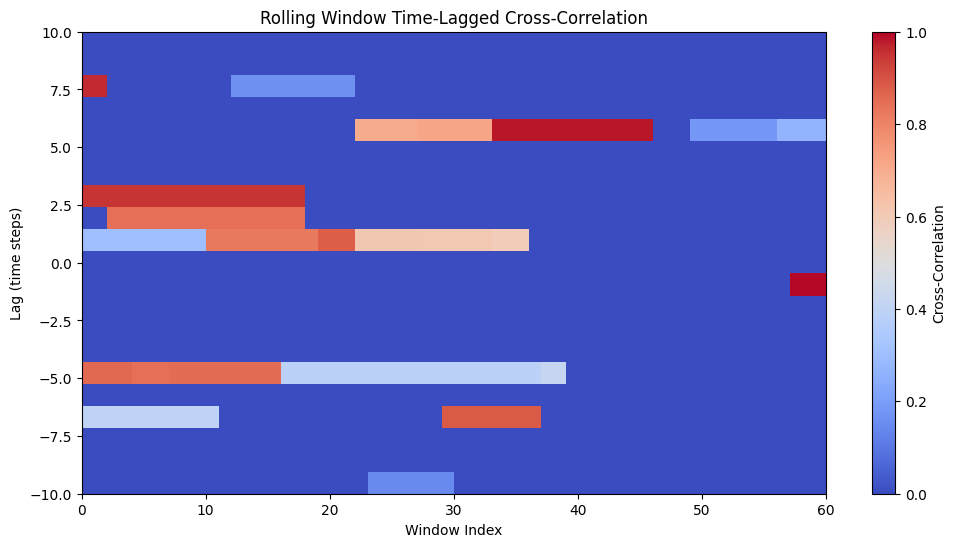

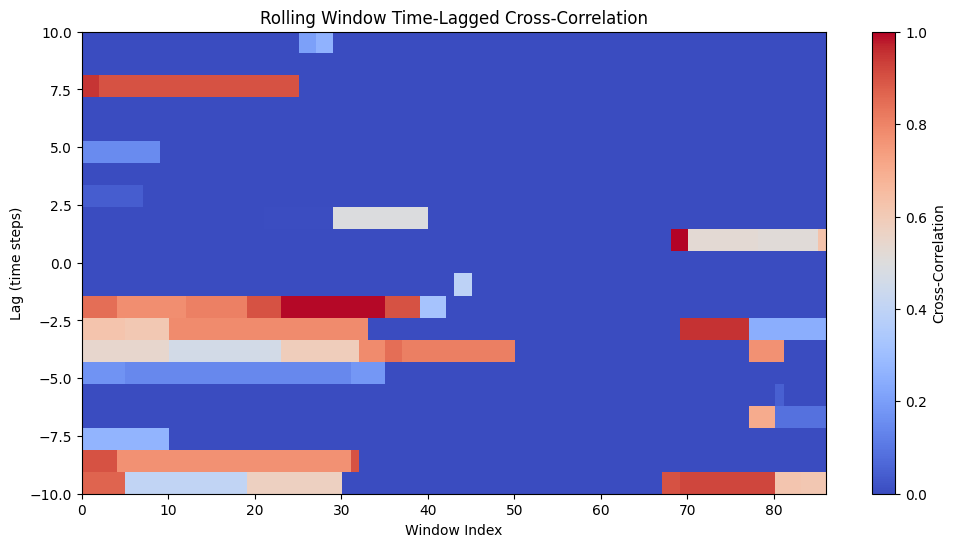

In [236]:
plt.figure(figsize=(12, 6)) #plot the cross-correlation results
plt.imshow(tlcc_results_td_mean.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_td_mean), -10, 10],vmin=0,vmax=1)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_asd_mean.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_asd_mean), -10, 10],vmin=0,vmax=1)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_asd_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()

Rolling TLCC Summary:
prop_mother_leads: 0.117
prop_child_leads: 0.883
prop_synchronous: 0.000
avg_peak_lag: -3.917
std_peak_lag: 3.824
avg_max_corr: 0.772
std_max_corr: 0.316


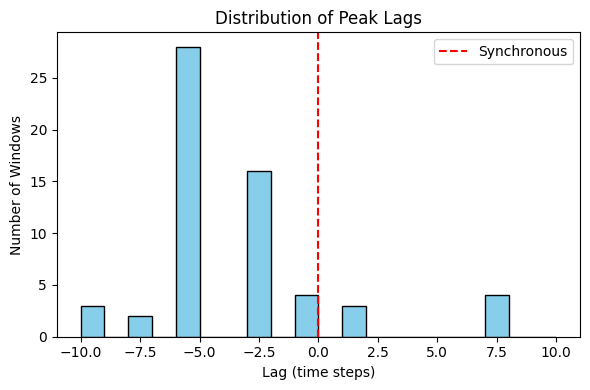

Rolling TLCC Summary:
prop_mother_leads: 0.500
prop_child_leads: 0.500
prop_synchronous: 0.000
avg_peak_lag: -2.047
std_peak_lag: 6.803
avg_max_corr: 0.714
std_max_corr: 0.367


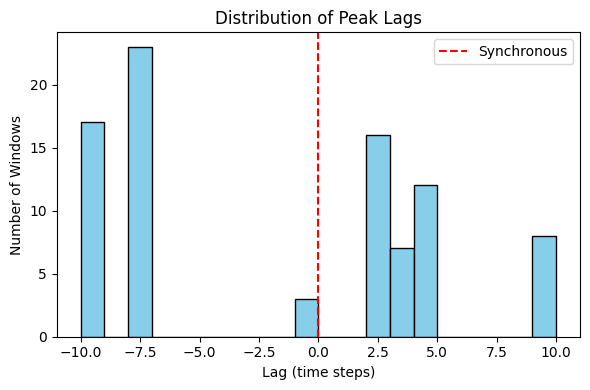

In [237]:
stats_td_mean, peak_lags_td_mean, max_corrs_td_mean = summarize_tlcc(tlcc_results_td_mean)
stats_asd_mean, peak_lags_asd_mean, max_corrs_asd_mean = summarize_tlcc(tlcc_results_asd_mean)

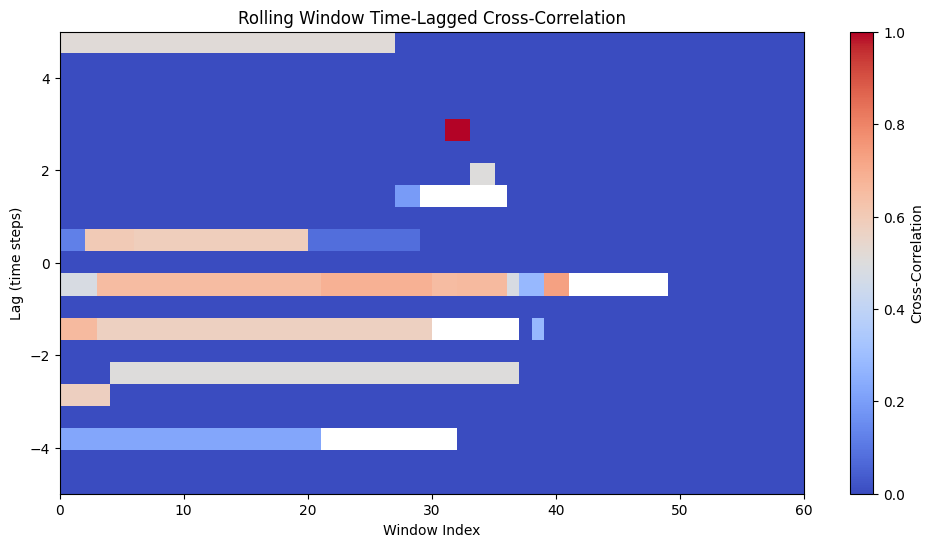

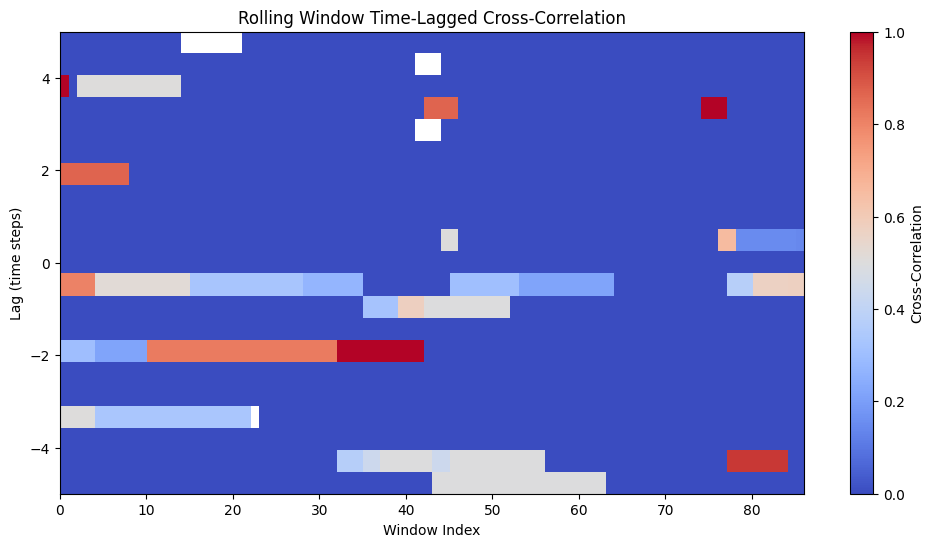

In [238]:
plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_td_mean_e.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_td_mean_e), -5, 5],vmin=0,vmax=1)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_td_emean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_asd_mean_e.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_asd_mean_e), -5, 5],vmin=0,vmax=1)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_asd_emean_'+folders_asd[0],bbox_inches='tight')
plt.show()

Rolling TLCC Summary:
prop_mother_leads: 0.650
prop_child_leads: 0.350
prop_synchronous: 0.000
avg_peak_lag: -2.550
std_peak_lag: 5.318
avg_max_corr: 0.449
std_max_corr: 0.324


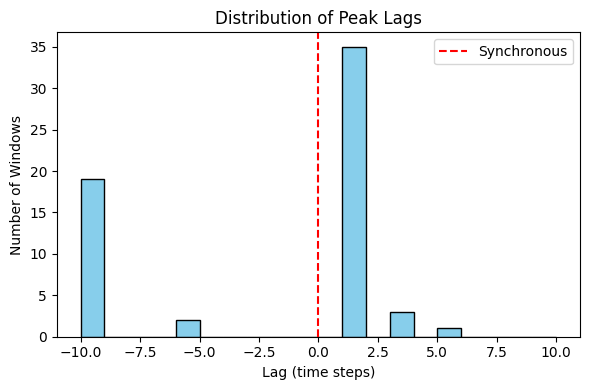

Rolling TLCC Summary:
prop_mother_leads: 0.709
prop_child_leads: 0.291
prop_synchronous: 0.000
avg_peak_lag: 1.500
std_peak_lag: 6.378
avg_max_corr: 0.686
std_max_corr: 0.310


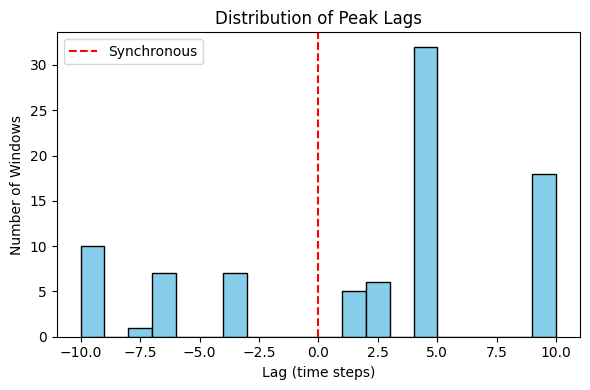

In [239]:
stats_td_emean, peak_lags_td_emean, max_corrs_td_emean = summarize_tlcc(tlcc_results_td_mean_e)
stats_asd_emean, peak_lags_asd_emean, max_corrs_asd_emean = summarize_tlcc(tlcc_results_asd_mean_e)

In [47]:
def normalize_with_mask(series):
    """Normalize a time series while ignoring NaN values."""
    valid_idx = ~np.isnan(series)  # Find non-NaN values
    series_norm = np.zeros_like(series) * np.nan  # Keep NaNs
    series_norm[valid_idx] = (series[valid_idx] - np.nanmin(series[valid_idx])) / (np.nanmax(series[valid_idx]) - np.nanmin(series[valid_idx]))
    return series_norm

def crp_analysis(series1, series2, threshold): #cross-recurrence plot
    N = len(series1)
    crp_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.isnan(series1[i]) or np.isnan(series2[j]):
                crp_matrix[i, j] = np.nan  # Ignore NaN values
            else:
                distance = np.abs(series1[i]-series2[j])
                crp_matrix[i, j] = 1 if distance < threshold else 0

    return crp_matrix

In [48]:
from collections import Counter

def extract_diagonal_lines(crp_matrix, min_length=2):
    """Extract diagonal line lengths (excluding the main diagonal)"""
    N = crp_matrix.shape[0]
    diagonals = []
    for k in range(-N + 1, N):
        diag = np.diagonal(crp_matrix, offset=k)
        if len(diag) < min_length:
            continue
        count = 0
        for val in diag:
            if val == 1:
                count += 1
            else:
                if count >= min_length:
                    diagonals.append(count)
                count = 0
        if count >= min_length:
            diagonals.append(count)
    return diagonals

def extract_vertical_lines(crp_matrix, min_length=2):
    """Extract vertical line lengths"""
    N = crp_matrix.shape[0]
    verticals = []
    for col in range(N):
        count = 0
        for row in range(N):
            val = crp_matrix[row, col]
            if val == 1:
                count += 1
            else:
                if count >= min_length:
                    verticals.append(count)
                count = 0
        if count >= min_length:
            verticals.append(count)
    return verticals

def crqa_metrics(crp_matrix, min_length=2):
    valid_mask = ~np.isnan(crp_matrix)
    crp_valid = crp_matrix[valid_mask]

    RR = np.nansum(crp_matrix) / np.sum(valid_mask)  # Recurrence Rate

    diagonals = extract_diagonal_lines(crp_matrix, min_length)
    verticals = extract_vertical_lines(crp_matrix, min_length)

    # Determinism: proportion of recurrence points forming diagonal lines
    total_diag_points = np.sum(diagonals)
    total_rec_points = np.nansum(crp_matrix)
    DET = total_diag_points / total_rec_points if total_rec_points > 0 else 0

    # Longest Diagonal Line
    Lmax = max(diagonals) if diagonals else 0

    # Entropy (Shannon) of diagonal line lengths
    if diagonals:
        diag_counts = Counter(diagonals)
        diag_probs = np.array(list(diag_counts.values())) / sum(diag_counts.values())
        ENTR = -np.sum(diag_probs * np.log2(diag_probs))
    else:
        ENTR = 0

    # Laminarity: proportion of vertical recurrence points forming vertical lines
    total_vert_points = np.sum(verticals)
    LAM = total_vert_points / total_rec_points if total_rec_points > 0 else 0

    # Trapping Time: average vertical line length
    TT = np.mean(verticals) if verticals else 0

    return {
        "RR": RR,
        "DET": DET,
        "Lmax": Lmax,
        "ENTR": ENTR,
        "LAM": LAM,
        "TT": TT
    }


In [49]:
pitch_p_td_nan=pitch_p_td_r.copy()
pitch_p_td_nan[np.where(np.abs(pitch_p_td_n[:,1])<0.00001)[0],1]=np.nan

pitch_p_asd_nan=pitch_p_asd_r.copy()
pitch_p_asd_nan[np.where(np.abs(pitch_p_asd_n[:,1])<0.00001)[0],1]=np.nan

pitch_c_td_nan=pitch_c_td_r.copy()
pitch_c_td_nan[np.where(np.abs(pitch_c_td_n[:,1])<0.00001)[0],1]=np.nan

pitch_c_asd_nan=pitch_c_asd_r.copy()
pitch_c_asd_nan[np.where(np.abs(pitch_c_asd_n[:,1])<0.00001)[0],1]=np.nan

In [50]:

pitch_p_td_nan[np.where(np.abs(pitch_p_td_n[:,5])<0.00001)[0],5]=np.nan


pitch_p_asd_nan[np.where(np.abs(pitch_p_asd_n[:,5])<0.00001)[0],5]=np.nan


pitch_c_td_nan[np.where(np.abs(pitch_c_td_n[:,5])<0.00001)[0],5]=np.nan


pitch_c_asd_nan[np.where(np.abs(pitch_c_asd_n[:,5])<0.00001)[0],5]=np.nan

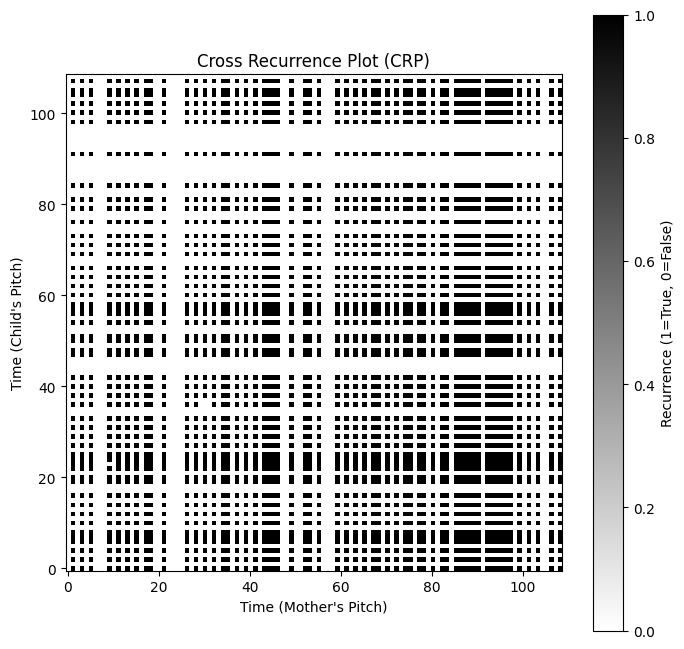

In [51]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_td_nan[:,1])
series2_norm = normalize_with_mask(pitch_c_td_nan[:,1])

# Compute CRP with a chosen threshold
threshold = 1  # Adjust based on data range when the threshold is 1, it shows the CRP of vocal onset
crp_matrix_td = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix_td, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_td_'+folders_td[0],bbox_inches='tight')
plt.show()

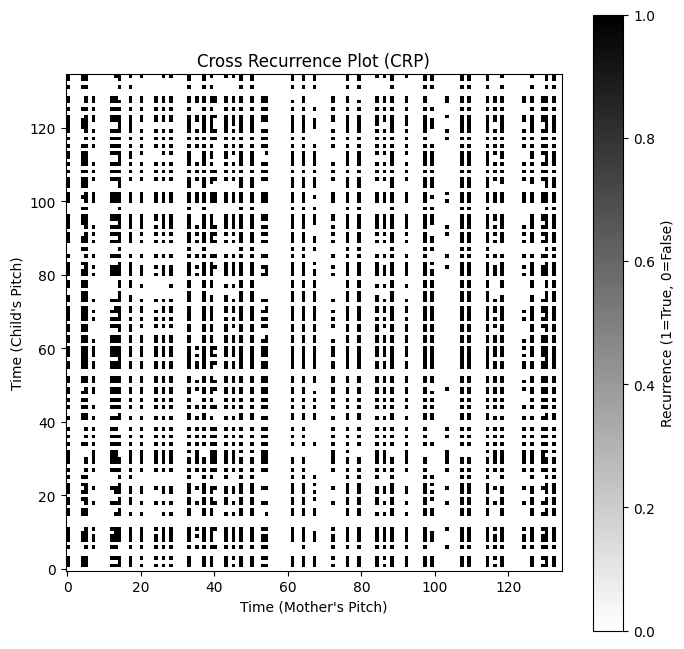

In [52]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_asd_nan[:,1])
series2_norm = normalize_with_mask(pitch_c_asd_nan[:,1])

# Compute CRP with a chosen threshold
threshold = 0.5  # Adjust based on data range
crp_matrix_asd = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix_asd, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_asd_'+folders_asd[0],bbox_inches='tight')
plt.show()

In [53]:
metrics_td = crqa_metrics(crp_matrix_td)
metrics_asd = crqa_metrics(crp_matrix_asd)

In [54]:
for k, v in metrics_td.items():
    print('TD: ',f"{k}: {v:.3f}")
for k, v in metrics_asd.items():
    print(f"{k}: {v:.3f}")

TD:  RR: 0.999
TD:  DET: 0.136
TD:  Lmax: 4.000
TD:  ENTR: 0.824
TD:  LAM: 0.360
TD:  TT: 2.567
RR: 0.800
DET: 0.091
Lmax: 3.000
ENTR: 0.279
LAM: 0.700
TT: 2.804


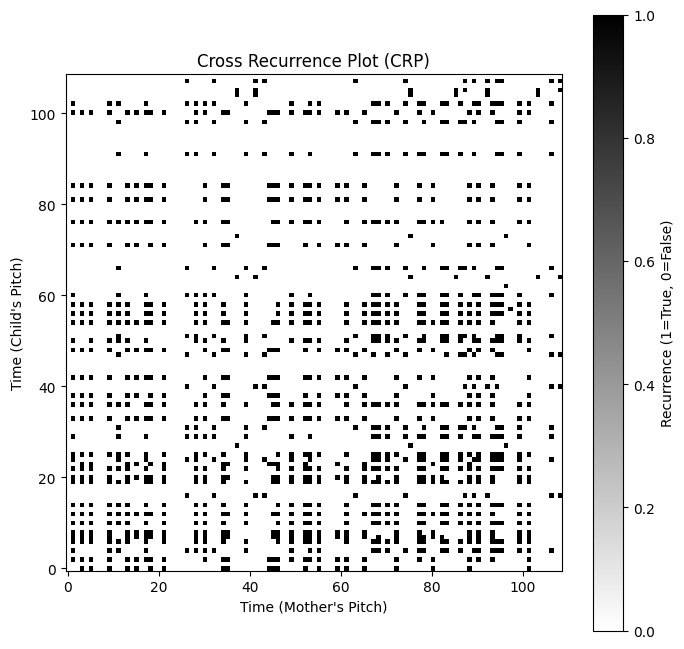

In [55]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_td_nan[:,5])
series2_norm = normalize_with_mask(pitch_c_td_nan[:,5])

# Compute CRP with a chosen threshold
threshold = 0.1  # Adjust based on data range when the threshold is 1, it shows the CRP of vocal onset
crp_matrix_td_d = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix_td_d, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_td_duration_'+folders_td[0],bbox_inches='tight')
plt.show()

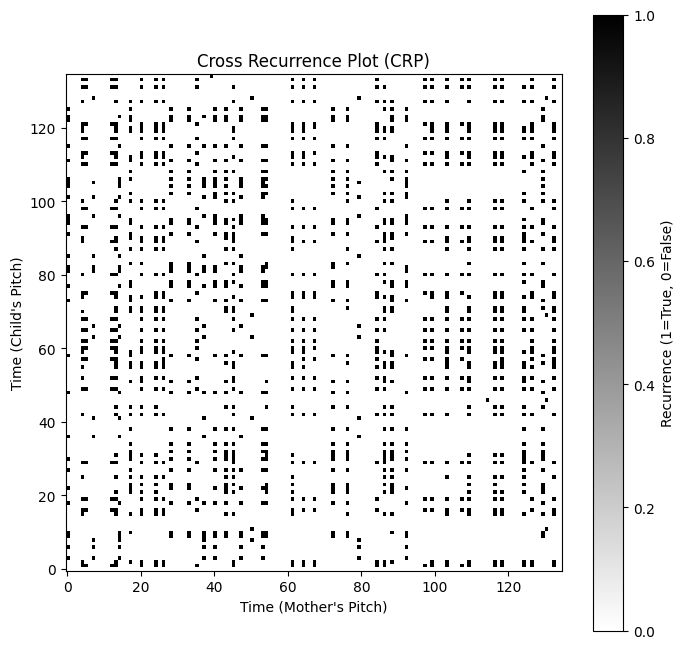

In [56]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_asd_nan[:,5])
series2_norm = normalize_with_mask(pitch_c_asd_nan[:,5])

# Compute CRP with a chosen threshold
threshold = 0.1  # Adjust based on data range when the threshold is 1, it shows the CRP of vocal onset
crp_matrix_asd_d = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix_asd_d, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_asd_duration_'+folders_asd[0],bbox_inches='tight')
plt.show()

In [57]:
metrics_td_d = crqa_metrics(crp_matrix_td_d)
metrics_asd_d = crqa_metrics(crp_matrix_asd_d)

In [58]:
for k, v in metrics_td_d.items():
    print('TD: ',f"{k}: {v:.3f}")
for k, v in metrics_asd_d.items():
    print(f"{k}: {v:.3f}")

TD:  RR: 0.397
TD:  DET: 0.057
TD:  Lmax: 3.000
TD:  ENTR: 0.196
TD:  LAM: 0.211
TD:  TT: 2.205
RR: 0.344
DET: 0.032
Lmax: 3.000
ENTR: 0.267
LAM: 0.394
TT: 2.238


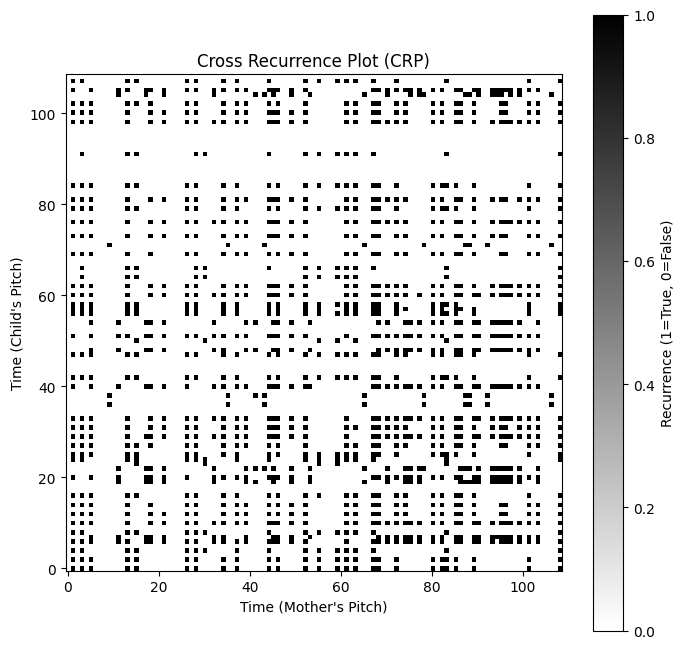

In [59]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_td_nan[:,1])
series2_norm = normalize_with_mask(pitch_c_td_nan[:,1])

# Compute CRP with a chosen threshold
threshold = 0.2  # Adjust based on data range when the threshold is 1, it shows the CRP of vocal onset
crp_matrix_td_p = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix_td_p, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

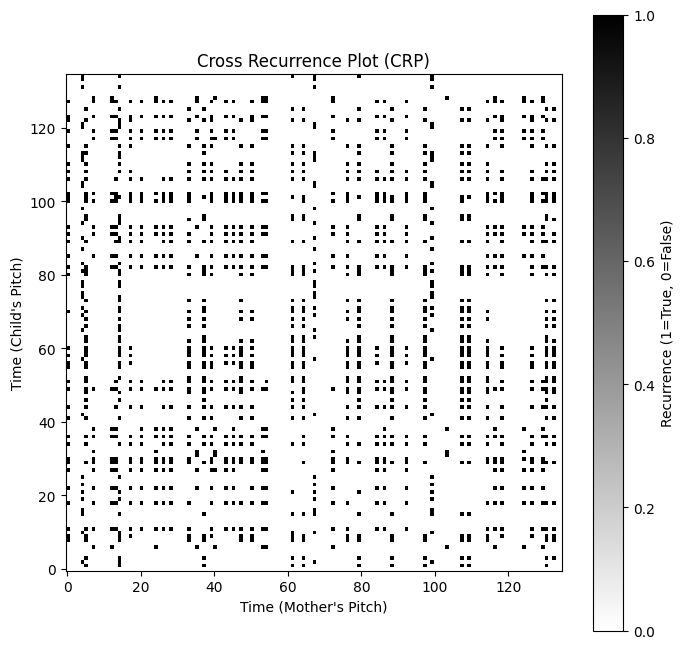

In [60]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_asd_nan[:,1])
series2_norm = normalize_with_mask(pitch_c_asd_nan[:,1])

# Compute CRP with a chosen threshold
threshold = 0.2  # Adjust based on data range when the threshold is 1, it shows the CRP of vocal onset
crp_matrix_asd_p = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix_asd_p, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_asd_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()

In [61]:
metrics_td_p = crqa_metrics(crp_matrix_td_p)
metrics_asd_p = crqa_metrics(crp_matrix_asd_p)

In [62]:
for k, v in metrics_td_p.items():
    print('TD: ',f"{k}: {v:.3f}")
for k, v in metrics_asd_p.items():
    print(f"{k}: {v:.3f}")

TD:  RR: 0.460
TD:  DET: 0.058
TD:  Lmax: 2.000
TD:  ENTR: -0.000
TD:  LAM: 0.198
TD:  TT: 2.223
RR: 0.345
DET: 0.035
Lmax: 2.000
ENTR: -0.000
LAM: 0.359
TT: 2.249


In [327]:
def compute_mutual_information(series1, series2, num_bins=5): #mutual information
    """
    Compute the mutual information between two time series.
    
    :param series1: First time series (e.g., mother's pitch).
    :param series2: Second time series (e.g., child's pitch).
    :param num_bins: Number of bins for discretization.
    :return: Mutual information score.
    """
    # Remove NaNs
    valid_idx = ~np.isnan(series1) & ~np.isnan(series2)
    series1, series2 = series1[valid_idx], series2[valid_idx]
    #print(len(series1))

    # Reshape for sklearn function
    series1 = series1.reshape(-1, 1)
    series2 = series2.reshape(-1, 1)

    # Compute Mutual Information
    if len(series1)>=6 and len(series2)>=6:
        mi_score = mutual_info_regression(series1, series2, discrete_features=False, n_neighbors=num_bins)
    else:
        mi_score=[0]
    
    return mi_score[0]  # MI value

In [328]:
def time_lagged_mutual_information(series1, series2, max_lag=10, num_bins=5): # time lag mutual information
    """
    Compute mutual information at different time lags.
    
    :param series1: First time series (e.g., mother's pitch).
    :param series2: Second time series (e.g., child's pitch).
    :param max_lag: Maximum lag to consider.
    :return: Array of mutual information values for each lag.
    """
    mi_scores = []
    lags = np.arange(-max_lag, max_lag + 1)

    for lag in lags:
        if lag > 0:
            mi = compute_mutual_information(series1[:-lag], series2[lag:], num_bins)
        elif lag < 0:
            mi = compute_mutual_information(series1[-lag:], series2[:lag], num_bins)
        else:
            mi = compute_mutual_information(series1, series2, num_bins)
        mi_scores.append(mi)

    return lags, np.array(mi_scores)


In [329]:
from scipy.signal import find_peaks

def summarize_tlmi(lags, mi_lagged, lag_step_ms=None, peak_prominence=0.01, plot=True):
    """
    Summarize and visualize time-lagged mutual information (TLMI), including top 3 peaks.

    Parameters:
    - lags: Array of lag values (e.g., in time steps)
    - mi_lagged: Mutual information values at each lag
    - lag_step_ms: Optional, time step in milliseconds (to convert lags to ms)
    - peak_prominence: Minimum prominence to count local peaks
    - plot: Whether to display the TLMI plot

    Returns:
    - stats: Dictionary of summary statistics including top 3 peaks
    """
    stats = {}

    # Basic stats
    stats['mean_mi'] = np.mean(mi_lagged)
    stats['std_mi'] = np.std(mi_lagged)

    # Find all peaks
    peaks, _ = find_peaks(mi_lagged, prominence=peak_prominence)
    peak_vals = mi_lagged[peaks]
    peak_lags = lags[peaks]

    # Sort by peak value (highest first)
    sorted_idx = np.argsort(peak_vals)[::-1]
    sorted_peaks = peak_vals[sorted_idx]
    sorted_lags = peak_lags[sorted_idx]

    # Extract top 3 peaks
    for i in range(min(3, len(sorted_peaks))):
        stats[f'peak_{i+1}_mi'] = sorted_peaks[i]
        stats[f'peak_{i+1}_lag'] = sorted_lags[i]
        if lag_step_ms:
            stats[f'peak_{i+1}_lag_ms'] = sorted_lags[i] * lag_step_ms
        stats[f'peak_{i+1}_leader'] = (
            "Mother leads" if sorted_lags[i] > 0 else
            "Child leads" if sorted_lags[i] < 0 else
            "Synchronous"
        )

    stats['n_local_peaks'] = len(peaks)

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(lags, mi_lagged, marker='o', label='MI')
        plt.axvline(0, color='red', linestyle='--', label='Lag = 0')
        if len(sorted_lags) > 0:
            plt.axvline(sorted_lags[0], color='green', linestyle='--', label=f'Peak 1 = {sorted_lags[0]}')
        if len(sorted_lags) > 1:
            plt.axvline(sorted_lags[1], color='blue', linestyle='--', label=f'Peak 2 = {sorted_lags[1]}')
        if len(sorted_lags) > 2:
            plt.axvline(sorted_lags[2], color='purple', linestyle='--', label=f'Peak 3 = {sorted_lags[2]}')
        plt.xlabel("Lag (time steps)" + (f" ({lag_step_ms} ms/step)" if lag_step_ms else ""))
        plt.ylabel("Mutual Information")
        plt.title("Time-Lagged Mutual Information (TLMI)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return stats

In [330]:
def renan(series1in,series2in):
    s_p_td_out=series1in.copy()
    s_c_td_out=series2in.copy()
    s_p_td_out[np.where(np.abs(series1in)<0.0000001)[0]] = np.nan
    s_c_td_out[np.where(np.abs(series2in)<0.0000001)[0]] = np.nan 
    return s_p_td_out,s_c_td_out

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

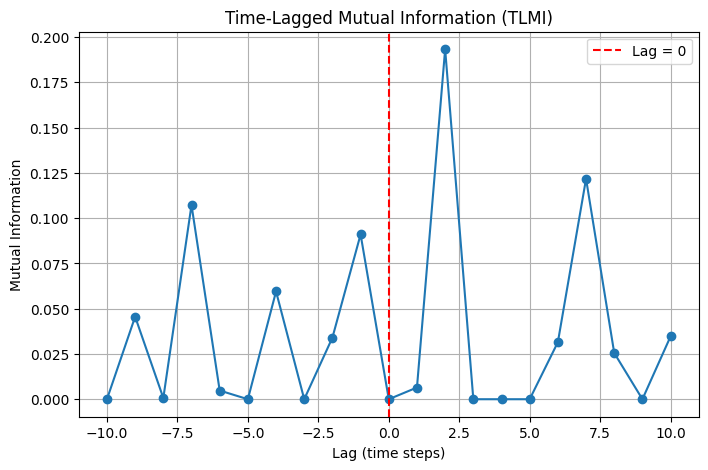

In [331]:

# Compute Time-Lagged Mutual Information
s_p_td,s_c_td=renan(pitch_p_td_n[:,1],pitch_c_td_n[:,1])

lags_p_td, mi_lagged_p_td = time_lagged_mutual_information(s_p_td, s_c_td)

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags_p_td, mi_lagged_p_td, marker='o')
#plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_td_pitch_mean_'+folders_td[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()


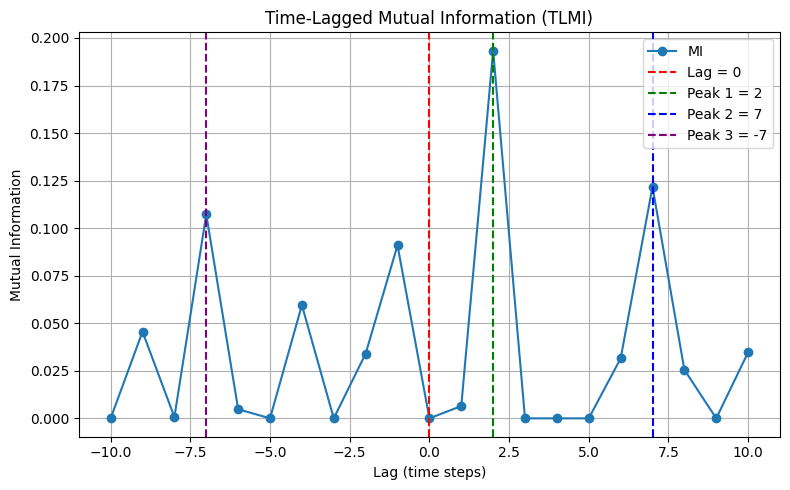

mean_mi: 0.036
std_mi: 0.051
peak_1_mi: 0.193
peak_1_lag: 2
peak_1_leader: Mother leads
peak_2_mi: 0.122
peak_2_lag: 7
peak_2_leader: Mother leads
peak_3_mi: 0.107
peak_3_lag: -7
peak_3_leader: Child leads
n_local_peaks: 6.000


In [338]:
stats_tlmi_p_td = summarize_tlmi(lags_p_td, mi_lagged_p_td)

for k, v in stats_tlmi_p_td.items():
    print(f"{k}: {v:.3f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

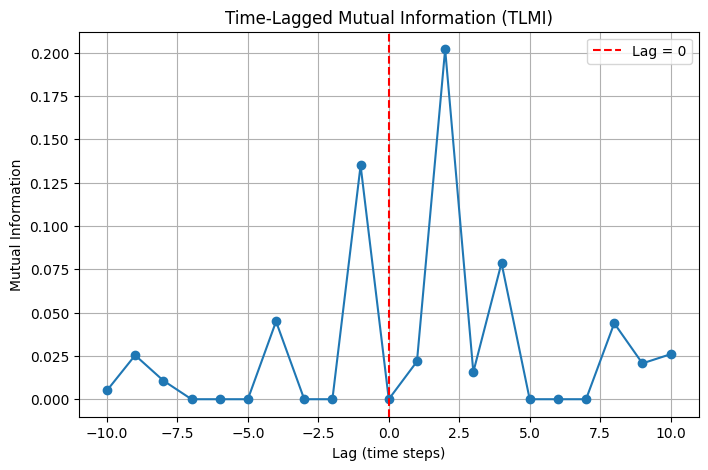

In [333]:
# Compute Time-Lagged Mutual Information
s_p_asd,s_c_asd=renan(pitch_p_asd_n[:,1],pitch_c_asd_n[:,1])

lags_p_asd, mi_lagged_p_asd = time_lagged_mutual_information(s_p_asd, s_c_asd)

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags_p_asd, mi_lagged_p_asd, marker='o')
#plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_asd_pitch_mean_'+folders_asd[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

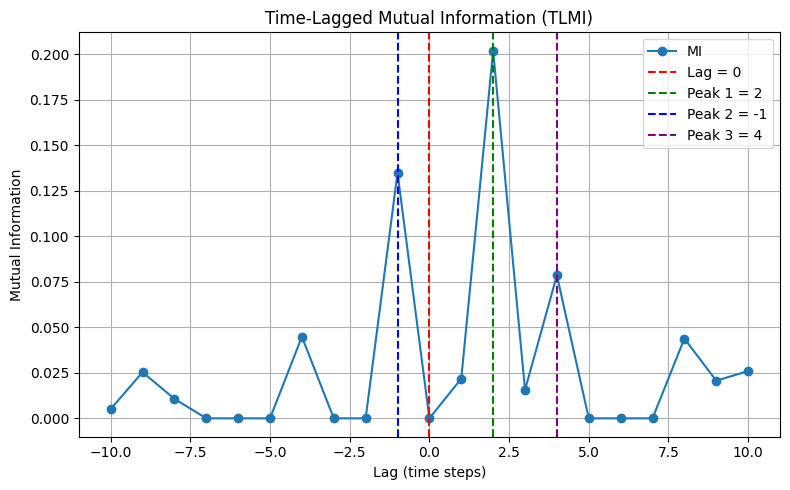

mean_mi: 0.036
std_mi: 0.051
peak_1_mi: 0.193
peak_1_lag: 2
peak_1_leader: Mother leads
peak_2_mi: 0.122
peak_2_lag: 7
peak_2_leader: Mother leads
peak_3_mi: 0.107
peak_3_lag: -7
peak_3_leader: Child leads
n_local_peaks: 6.000


In [339]:
stats_tlmi_p_asd = summarize_tlmi(lags_p_asd, mi_lagged_p_asd)

for k, v in stats_tlmi_p_td.items():
    print(f"{k}: {v:.3f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

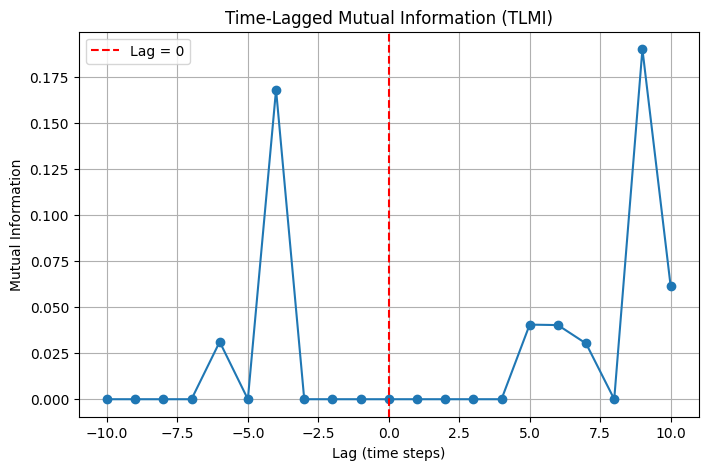

In [336]:
# Compute Time-Lagged Mutual Information
s_p_td_e,s_c_td_e=renan(energy_p_td_n[:,1],energy_c_td_n[:,1])

lags_e_td, mi_lagged_e_td = time_lagged_mutual_information(s_p_td_e,s_c_td_e)

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags_e_td, mi_lagged_e_td, marker='o')
#plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_td_energy_mean_'+folders_td[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

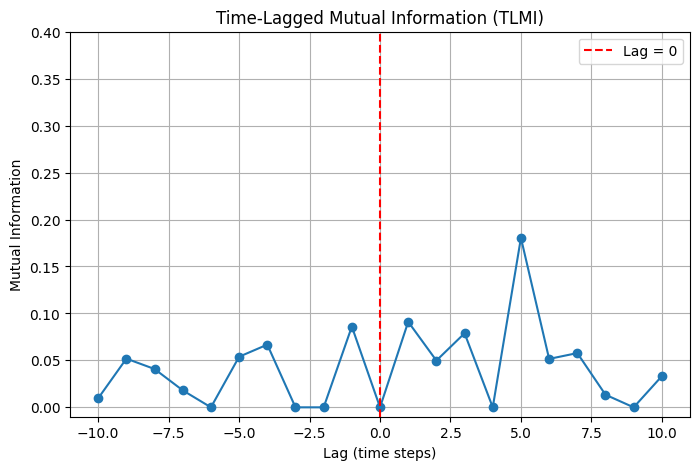

In [337]:

# Compute Time-Lagged Mutual Information
s_p_asd_e,s_c_asd_e=renan(energy_p_asd_n[:,1],energy_c_asd_n[:,1])
lags_e_asd, mi_lagged_e_asd = time_lagged_mutual_information(s_p_asd_e,s_c_asd_e)

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags_e_asd, mi_lagged_e_asd, marker='o')
plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_asd_energy_mean_'+folders_asd[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

In [72]:
#!pip3 install pycwt

In [73]:
import pycwt as wavelet  # Import the wavelet package
from pycwt.helpers import find
from scipy.ndimage import gaussian_filter

In [74]:
def smooth_wavelet_power(power, scales, sigma=1):
    """
    Custom function to smooth wavelet power using Gaussian filtering.
    
    :param power: Wavelet power spectrum (2D array).
    :param scales: Array of scales.
    :param sigma: Standard deviation for Gaussian smoothing.
    :return: Smoothed power spectrum.
    """
    smoothed = np.copy(power)
    for i in range(len(scales)):
        smoothed[i, :] = gaussian_filter(power[i, :], sigma)
    return smoothed

def cross_wavelet_analysis(series1, series2, dt=1.0): # cross wavelet analysis
    """
    Perform Cross-Wavelet Transform (XWT) and Wavelet Coherence (WTC).

    :param series1: First time series (e.g., mother's pitch).
    :param series2: Second time series (e.g., child's pitch).
    :param dt: Sampling period (default=1).
    :return: Wavelet coherence and cross-wavelet results.
    """
    # Remove NaNs (wavelet transform does not support NaNs)
    valid_idx = ~np.isnan(series1) & ~np.isnan(series2)
    series1, series2 = series1[valid_idx], series2[valid_idx]

    # Define the mother wavelet (Morlet)
    mother = wavelet.Morlet(6)

    # Define the smallest scale and number of scales
    s0 = 2 * dt  # Smallest resolvable scale
    dj = 1 / 12  # Frequency scale spacing
    J = int(7 / dj)  # Number of scales

    # Compute Continuous Wavelet Transform (CWT) for both signals
    wave1, scales, freqs, coi, _, _ = wavelet.cwt(series1, dt, dj=dj, s0=s0, J=J, wavelet=mother)
    wave2, _, _, _, _, _ = wavelet.cwt(series2, dt, dj=dj, s0=s0, J=J, wavelet=mother)

    # Compute Cross-Wavelet Transform (XWT)
    xwt = wave1 * np.conj(wave2)

    # Compute Wavelet Coherence (WTC) using Gaussian Smoothing
    s_wave1 = smooth_wavelet_power(np.abs(wave1) ** 2, scales)
    s_wave2 = smooth_wavelet_power(np.abs(wave2) ** 2, scales)
    s_xwt = smooth_wavelet_power(np.abs(xwt) ** 2, scales)
    coherence = s_xwt / (s_wave1 * s_wave2)  # Normalize coherence

    return coherence, freqs, coi

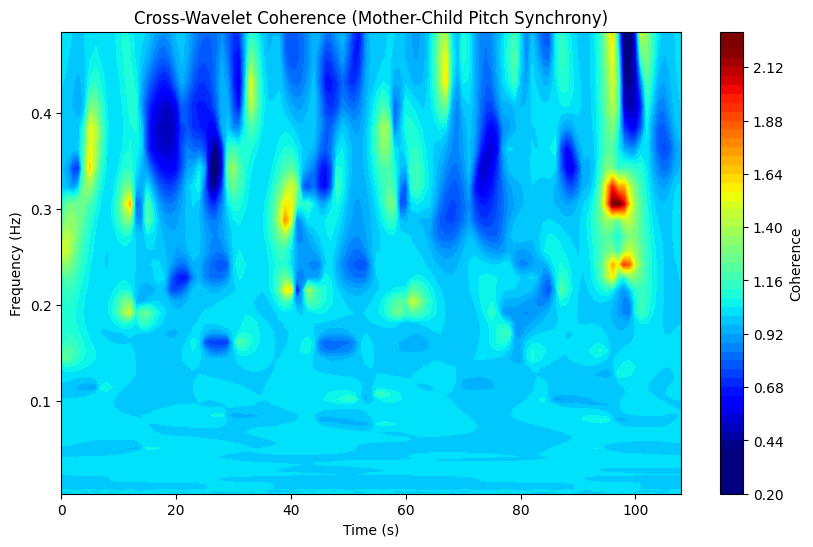

In [341]:
# Compute Cross-Wavelet Transform
coherence_p_td, freqs_p_td, coi_p_td = cross_wavelet_analysis(pitch_p_td_n[:,1], pitch_c_td_n[:,1])
time_p_td=np.arange(len(pitch_p_td_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time_p_td, freqs_p_td, coherence_p_td, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_td_pitch_mean_'+folders_td[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

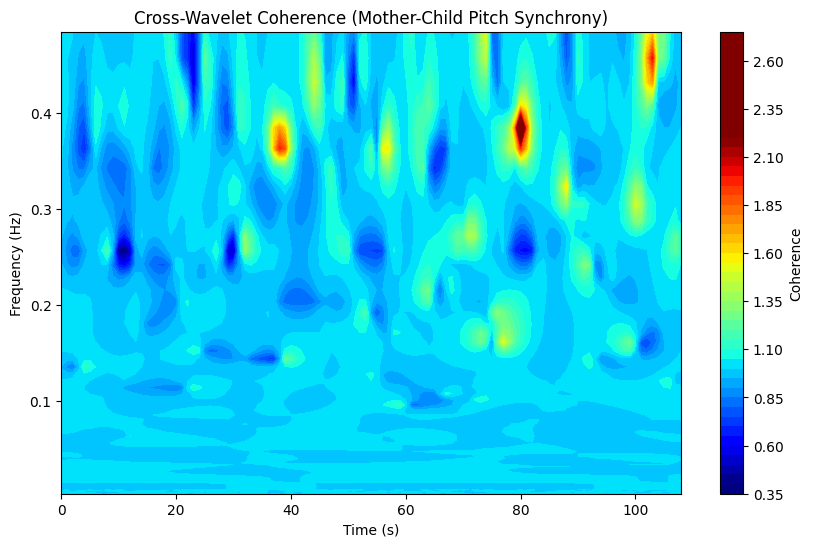

In [76]:
# Compute Cross-Wavelet Transform
coherence_e_td, freqs_e_td, coi_e_td = cross_wavelet_analysis(energy_p_td_n[:,1], energy_c_td_n[:,1])
time_e_td=np.arange(len(energy_p_td_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time_e_td, freqs_e_td, coherence_e_td, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_asd_pitch_mean_'+folders_asd[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

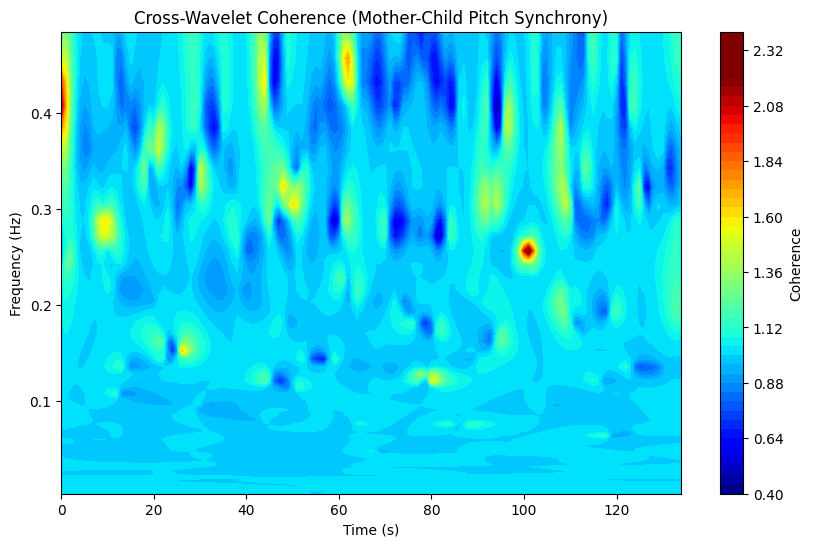

In [77]:
# Compute Cross-Wavelet Transform
coherence_p_asd, freqs_p_asd, coi_p_asd = cross_wavelet_analysis(pitch_p_asd_n[:,1], pitch_c_asd_n[:,1])
time_p_asd=np.arange(len(pitch_p_asd_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time_p_asd, freqs_p_asd, coherence_p_asd, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_td_energy_mean_'+folders_td[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

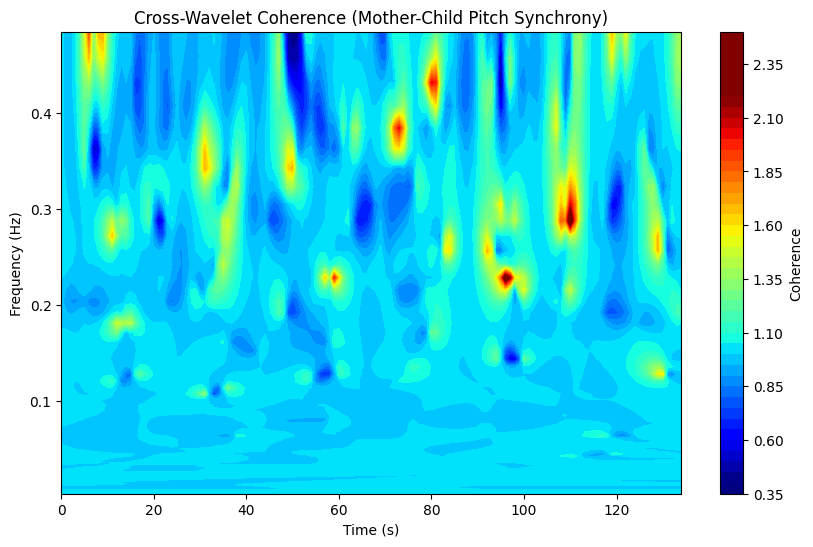

In [78]:
# Compute Cross-Wavelet Transform
coherence_e_asd, freqs_e_asd, coi_e_asd = cross_wavelet_analysis(energy_p_asd_n[:,1], energy_c_asd_n[:,1])
time_e_asd=np.arange(len(energy_p_asd_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time_e_asd, freqs_e_asd, coherence_e_asd, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_asd_energy_mean_'+folders_asd[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

In [79]:
def analyze_wavelet_coherence(coherence, freqs, time, band1=(0.1, 0.25), band2=(0.25, 0.5), threshold=1, plot=True):
    """
    Analyze cross-wavelet coherence results statistically.

    Parameters:
    - coherence: 2D array (freqs x timepoints), the coherence matrix
    - freqs: 1D array, frequencies corresponding to rows of coherence
    - time: 1D array, timepoints corresponding to columns of coherence
    - band: tuple, frequency range of interest (e.g., (0.1, 0.3) Hz)
    - threshold: float, coherence threshold for high synchrony detection
    - plot: bool, whether to produce summary plots

    Returns:
    - stats: dict containing summary statistics
    """
    stats = {}

    # 1. Global average coherence
    stats['mean_coherence'] = np.nanmean(coherence)

    # 2. Average coherence by frequency
    avg_by_freq = np.nanmean(coherence, axis=1)
    peak_freq = freqs[np.nanargmax(avg_by_freq)]
    stats['peak_coherence_freq'] = peak_freq
    stats['mean_coherence_by_freq'] = avg_by_freq

    # 3. Average coherence by time
    avg_by_time = np.nanmean(coherence, axis=0)
    stats['mean_coherence_by_time'] = avg_by_time

    # 4. Band-limited coherence
    band_mask1 = (freqs >= band1[0]) & (freqs <= band1[1])
    band_coherence1 = coherence[band_mask1, :]
    stats['mean_band_coherence_l'] = np.nanmean(band_coherence1)
    band_mask2 = (freqs >= band2[0]) & (freqs <= band2[1])
    band_coherence2 = coherence[band_mask2, :]
    stats['mean_band_coherence_h'] = np.nanmean(band_coherence2)
    
    # 5. High synchrony detection
    high_sync_mask = coherence > threshold
    stats['prop_coherence_above_threshold'] = np.sum(high_sync_mask) / coherence.size

    # 6. Optional plots
    if plot:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(freqs, avg_by_freq)
        plt.axvline(peak_freq, color='red', linestyle='--', label=f'Peak = {peak_freq:.2f} Hz')
        plt.ylim(0.96,1.1)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Mean Coherence")
        plt.title("Mean Coherence by Frequency")
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(time, avg_by_time)
        plt.ylim(0.96,1.1)
        plt.xlabel("Time (s)")
        plt.ylabel("Mean Coherence")
        plt.title("Coherence Over Time")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Optional mask plot
        plt.figure(figsize=(10, 5))
        plt.contourf(time, freqs, high_sync_mask, cmap="Greys", levels=1)
        plt.colorbar()
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.title(f"High Synchrony Mask (Coherence > {threshold})")
        plt.tight_layout()
        plt.show()

    return stats

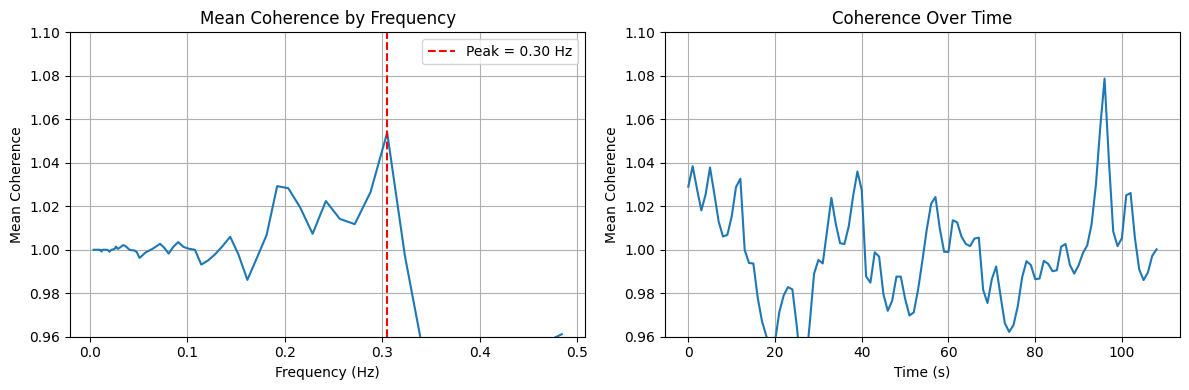

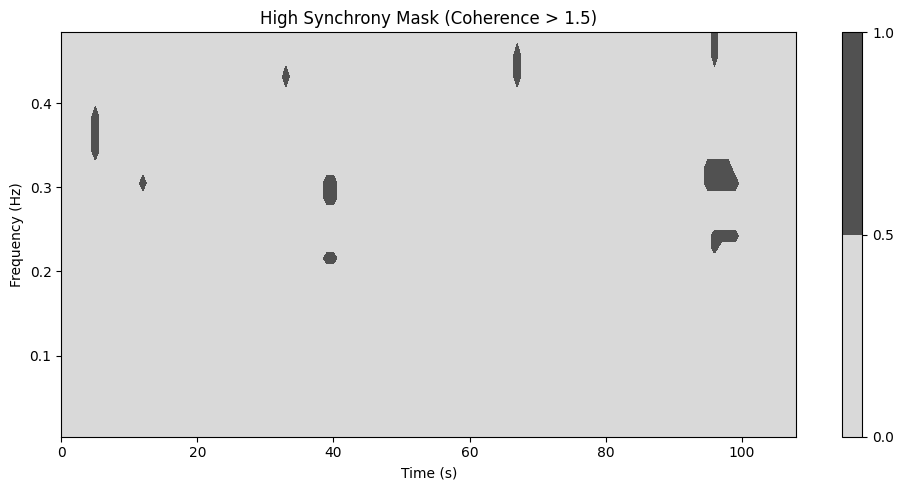

mean_coherence: 0.998
peak_coherence_freq: 0.305
mean_band_coherence_l: 1.007
mean_band_coherence_h: 0.965
prop_coherence_above_threshold: 0.003


In [80]:
stats_p_td = analyze_wavelet_coherence(coherence_p_td, freqs_p_td, time_p_td,
                                  band1=(0.1, 0.3), band2=(0.3, 0.5), threshold=1.5, plot=True)

# View summary stats
for k, v in stats_p_td.items():
    if isinstance(v, (int, float, np.floating)):
        print(f"{k}: {v:.3f}")

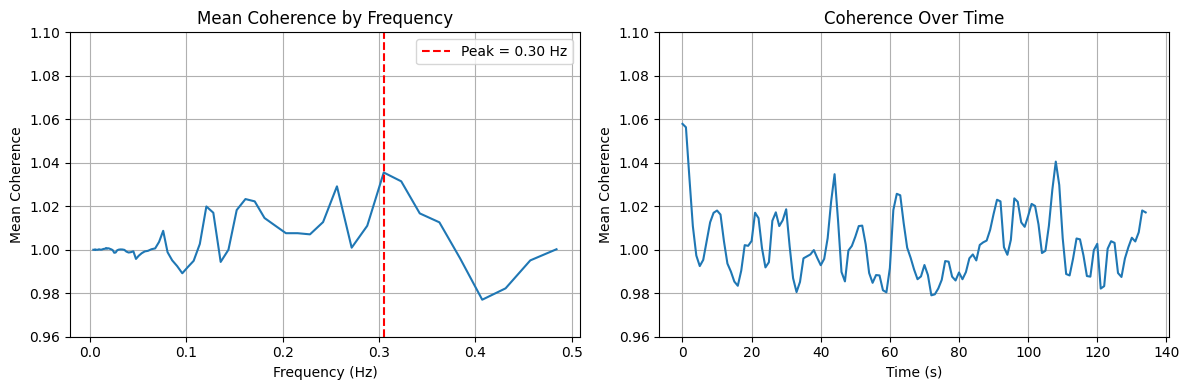

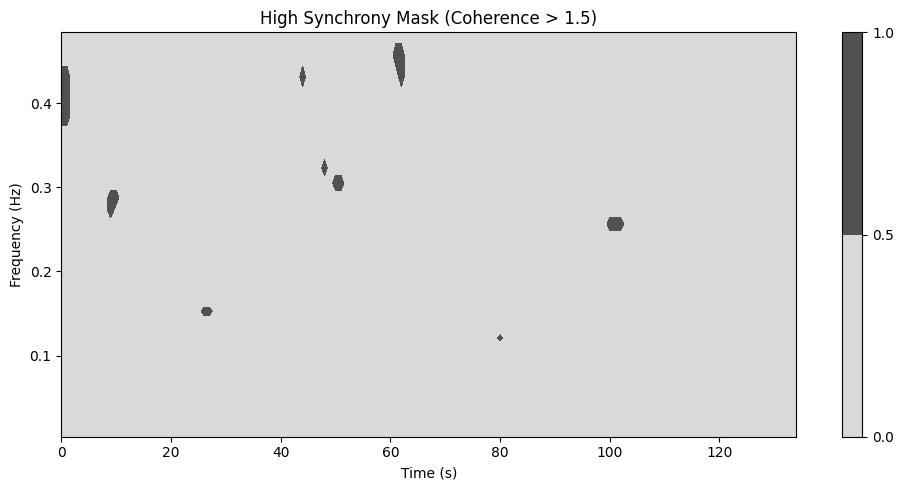

mean_coherence: 1.002
peak_coherence_freq: 0.305
mean_band_coherence_l: 1.010
mean_band_coherence_h: 1.005
prop_coherence_above_threshold: 0.002


In [81]:
stats_p_asd = analyze_wavelet_coherence(coherence_p_asd, freqs_p_asd, time_p_asd,
                                  band1=(0.1, 0.3), band2=(0.3, 0.5), threshold=1.5, plot=True)

# View summary stats
for k, v in stats_p_asd.items():
    if isinstance(v, (int, float, np.floating)):
        print(f"{k}: {v:.3f}")